In [4]:
# %matplotlib notebook 
# Uncomment above for interactive plots
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sympy as sym
from sympy import *
from scipy import integrate
import scipy.optimize
cmap = plt.get_cmap("tab10")

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

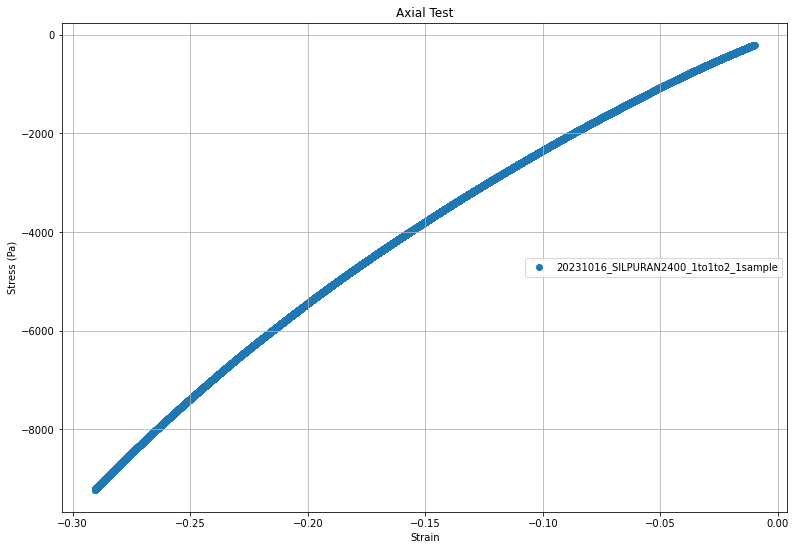

In [5]:
Mixtures = ['P7676_1to1','RT601_5to1','20201207_RT601_10to1to10','20201207_RT601_10to1to20','20201207_RT601_10to1to30','20201208_P7676_2to1','20201208_RT601_10to1to60','20201214_SILPURAN2400_1to1to1','20201214_SILPURAN2400_1to1to2','20201214_SILPURAN2400_2to2to3','20201215_SILPURAN2400_1to1to3','20210105_SILPURAN2400_4to4to9','20210106_SILPURAN2400_4to4to7','20231016_SILPURAN2400_1to1to2_1sample','231018_RT601_10to1to10','231020_Silp_1t1t2_Layer_1sample','231027_Silp_1t1t2_Layer3']
Stresses = []
Strains = []

plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    axial_tests = []
    for i in range(0,3):
        for j in range(0,3):
            try:
                axial_tests.append(np.asarray(pd.read_csv(r'C:\Users\21705319\Local_Documents\2018'+'\\'+Mixtures[n]+'\Sample'+str(i+1)+'_Test'+str(j+1)+'.csv', header=None, usecols=[0,1])))
            except:
                axial_tests.append(np.asarray(pd.read_csv(r'C:\Users\21705319\Local_Documents\2020'+'\\'+Mixtures[n]+'\Sample'+str(i+1)+'_Test'+str(j+1)+'.csv', header=None, usecols=[0,1])))
            axial_tests[i*3+j][:,0] = axial_tests[i*3+j][:,0] / 100
            axial_tests[i*3+j][:,1] = axial_tests[i*3+j][:,1] * 1000

    lower_strain_bound = 0
    for i in range(0,9):
        lower_strain_bound = max(lower_strain_bound,axial_tests[i][0,0])

    upper_strain_bound = 1
    for i in range(0,9):
        upper_strain_bound = min(upper_strain_bound,axial_tests[i][-1,0])

    average = 0*np.arange(lower_strain_bound,upper_strain_bound,1e-05)

    for i in range(0,3):
        for j in range(0,3):
            # plt.plot(-axial_tests[i*3+j][:,0],axial_tests[i*3+j][:,1], label = 'Sample'+str(i+1)+'_Test'+str(j+1))
            average = average + np.interp(np.arange(lower_strain_bound,upper_strain_bound,1e-05),axial_tests[i*3+j][:,0],axial_tests[i*3+j][:,1])
    
    average = average / 9
    w = 2000 # 2000
    average = moving_average(average,w)
    strain = moving_average(np.arange(lower_strain_bound,upper_strain_bound,1e-05),w)
    
    #for num_av in range(0,1):
    #    average = moving_average(average,w)
    #    strain = moving_average(strain,w)
    #ds = 250
    #average = average[::ds]
    #strain = strain[::ds]
    
    Stresses.append(average)
    Strains.append(strain)

    np.save(r'C:\Users\21705319\ Python Scripts\HyperelasticCurves\Stress'+Mixtures[n]+'.npy', average)
    np.save(r'C:\Users\21705319\ Python Scripts\HyperelasticCurves\Strain'+Mixtures[n]+'.npy', strain)

n = 13    
plt.scatter(-Strains[n],Stresses[n], label = Mixtures[n])

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-0.05,0])
#plt.ylim([-2000,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()



In [6]:
len(Stresses)

17

In [7]:
# print(str(list(-Strains[0])).replace(", ", "\n"))

In [8]:
# print(str(list(Stresses[0])).replace(", ", "\n"))

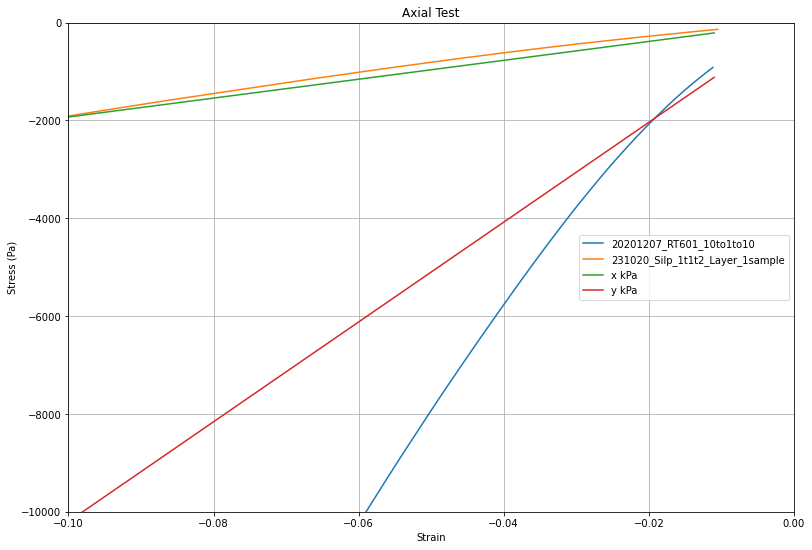

In [9]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(-Strains[2],Stresses[2], label = Mixtures[2])
plt.plot(-Strains[15],Stresses[15], label = Mixtures[15])
plt.plot(-Strains[0],-Strains[0]* 19300, label = "x kPa")
plt.plot(-Strains[0],-Strains[0]*102000, label = "y kPa")


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-10000,0])
plt.xlim([-0.1,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

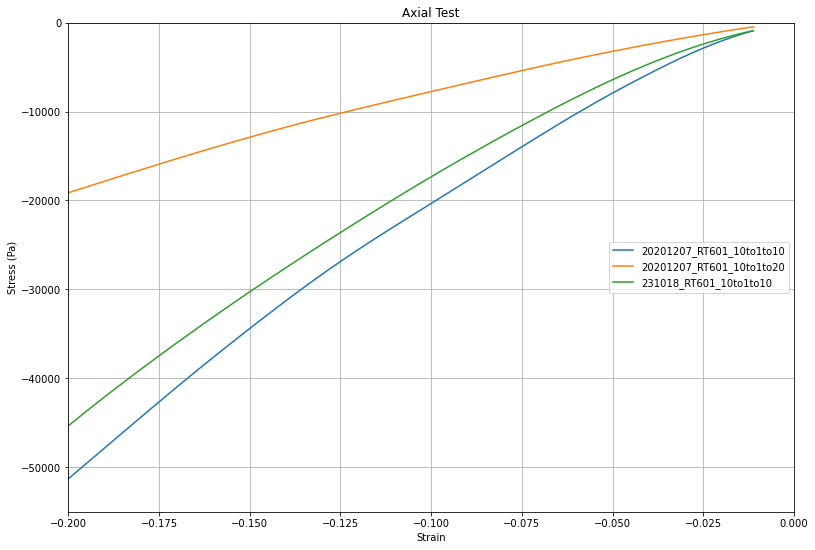

In [10]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(-Strains[2],Stresses[2], label = Mixtures[2])
plt.plot(-Strains[3],Stresses[3], label = Mixtures[3])
plt.plot(-Strains[14],Stresses[14], label = Mixtures[14])

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-55000,0])
plt.xlim([-0.20,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

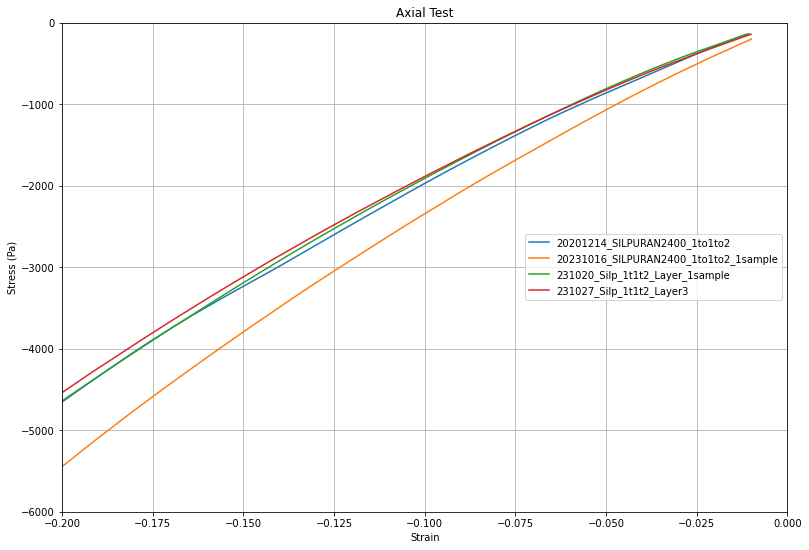

In [11]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

#plt.plot(-Strains[7],Stresses[7], label = Mixtures[7])
plt.plot(-Strains[8],Stresses[8], label = Mixtures[8])
plt.plot(-Strains[13],Stresses[13], label = Mixtures[13])
plt.plot(-Strains[15],Stresses[15], label = Mixtures[15])
plt.plot(-Strains[16],Stresses[16], label = Mixtures[16])

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-6000,0])
plt.xlim([-0.20,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

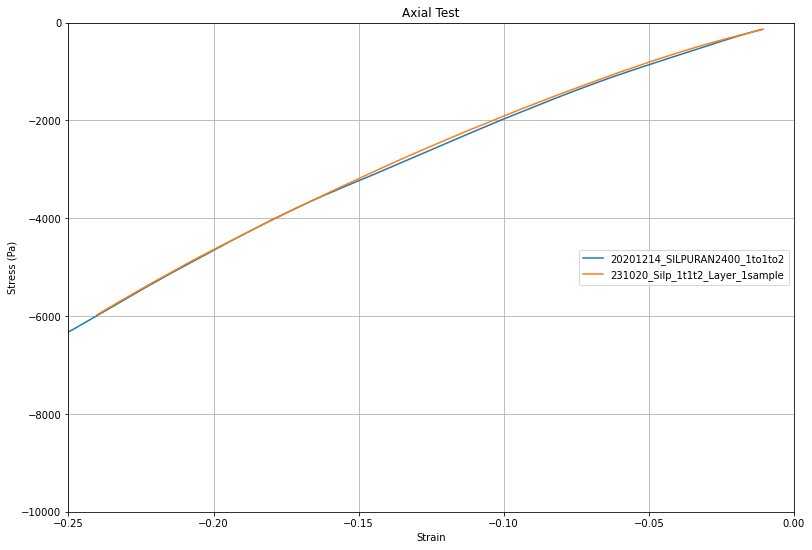

In [12]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

#plt.plot(-Strains[2],Stresses[2], label = Mixtures[2])
plt.plot(-Strains[8],Stresses[8], label = Mixtures[8])
#plt.plot(-Strains[13],Stresses[13], label = Mixtures[13])
#plt.plot(-Strains[14],Stresses[14], label = Mixtures[14])
plt.plot(-Strains[15],Stresses[15], label = Mixtures[15])


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-10000,0])
plt.xlim([-0.25,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

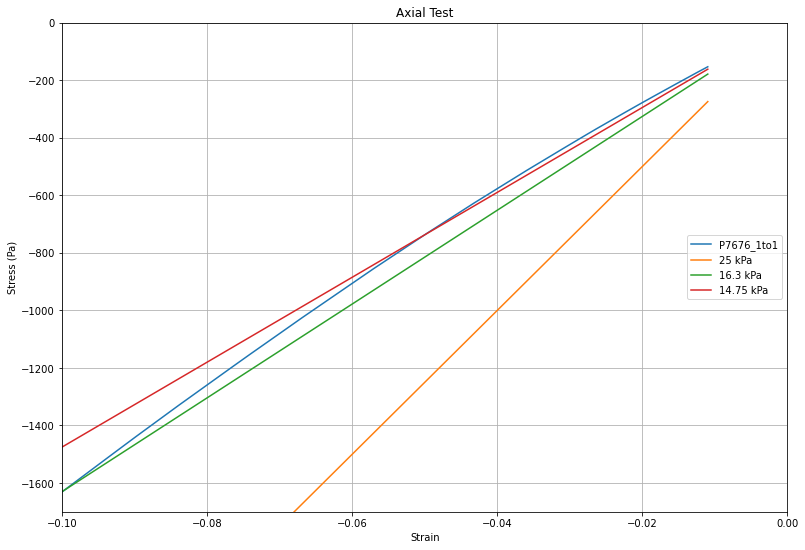

In [13]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(-Strains[0],Stresses[0], label = Mixtures[0])
plt.plot(-Strains[0],-Strains[0]*25000, label = "25 kPa")
plt.plot(-Strains[0],-Strains[0]*16300, label = "16.3 kPa")
plt.plot(-Strains[0],-Strains[0]*14750, label = "14.75 kPa")


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-1700,0])
plt.xlim([-0.1,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

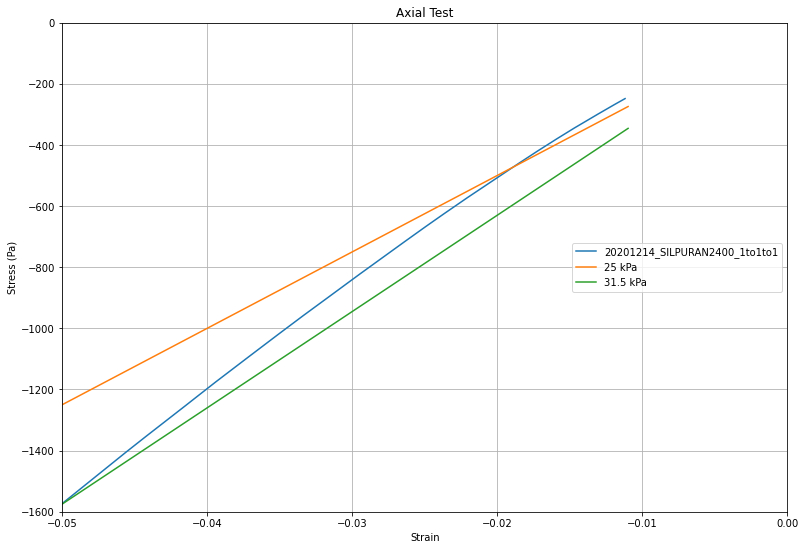

In [14]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(-Strains[7],Stresses[7], label = Mixtures[7])
plt.plot(-Strains[0],-Strains[0]*25000, label = "25 kPa")
#plt.plot(-Strains[0],-Strains[0]*31300, label = "30 kPa")
plt.plot(-Strains[0],-Strains[0]*31500, label = "31.5 kPa")


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-1600,0])
plt.xlim([-0.05,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

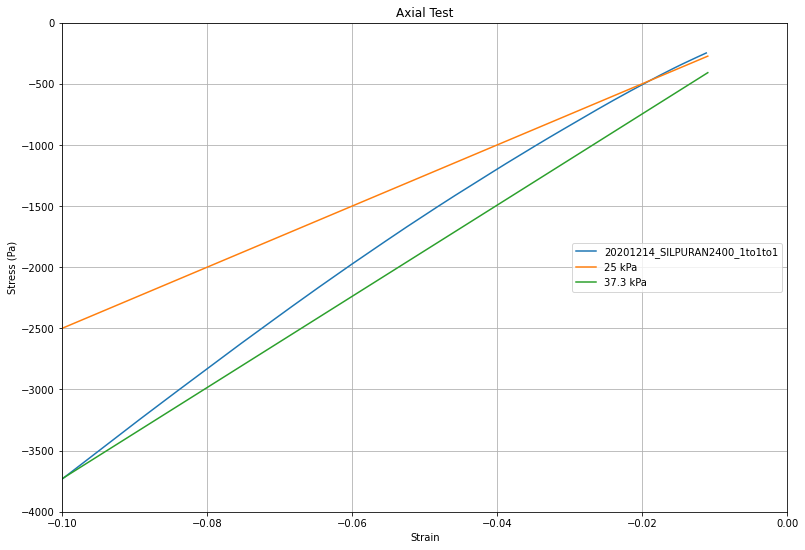

In [15]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(-Strains[7],Stresses[7], label = Mixtures[7])
plt.plot(-Strains[0],-Strains[0]*25000, label = "25 kPa")
#plt.plot(-Strains[0],-Strains[0]*37000, label = "s kPa")
plt.plot(-Strains[0],-Strains[0]*37300, label = "37.3 kPa")


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-4000,0])
plt.xlim([-0.1,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

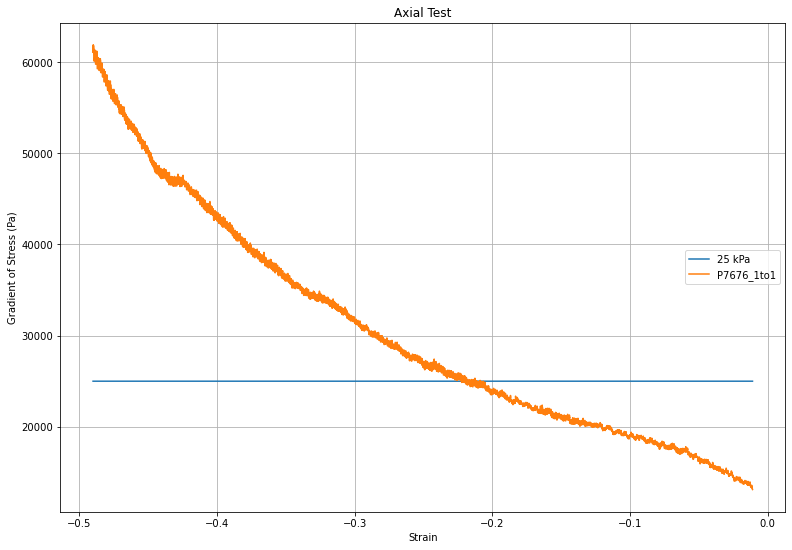

In [16]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(-Strains[0],np.gradient(-Strains[0]*25000,-Strains[0]), label = "25 kPa")
plt.plot(-Strains[0],np.gradient(Stresses[0],-Strains[0]), label = Mixtures[0])


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
#plt.ylim([-8000,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Gradient of Stress (Pa)")
plt.grid()
plt.show()

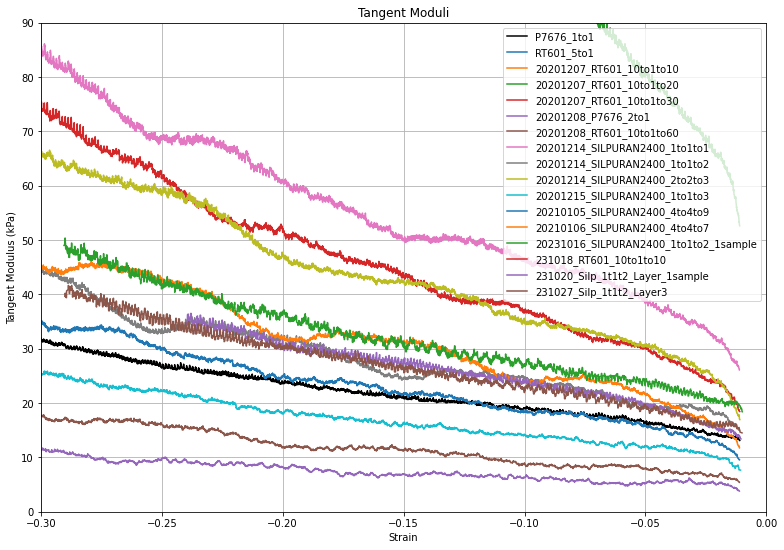

In [17]:
# Tangent Modulus
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
E = []

for n in range(0,len(Mixtures)):
    E.append(-np.gradient(Stresses[n],Strains[n]))
    if n == 0:
        plt.plot(-Strains[n],E[n] / 1000, label = Mixtures[n], color = 'black')
    else:
        plt.plot(-Strains[n],E[n] / 1000, label = Mixtures[n])

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([-0.3,0])
plt.ylim([0,90])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Tangent Moduli")
plt.xlabel("Strain")
plt.ylabel("Tangent Modulus (kPa)")
plt.grid()
plt.show()

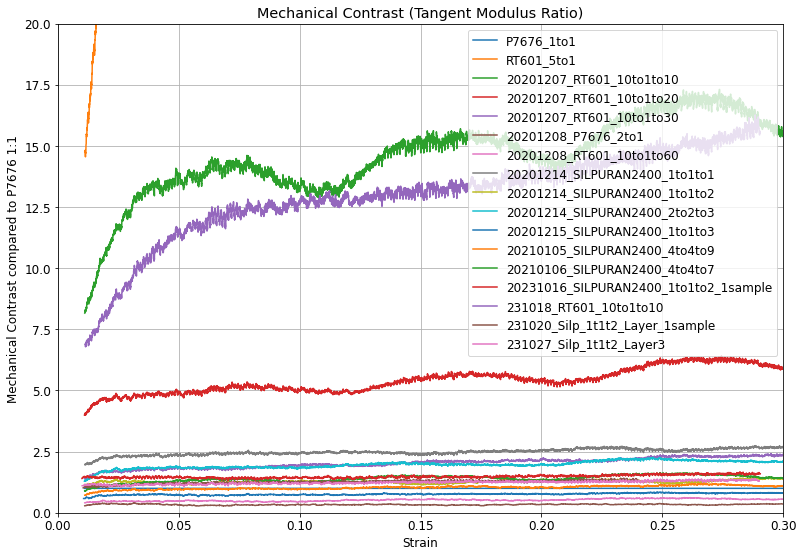

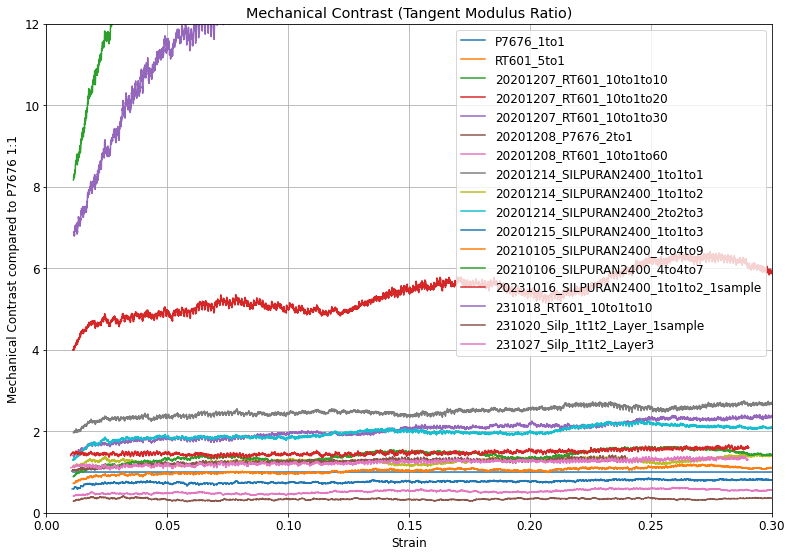

In [18]:
# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    plt.plot(Strains[n],E[n] / np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,0.3])
plt.ylim([0,20])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Strain")
plt.ylabel("Mechanical Contrast compared to P7676 1:1")
plt.grid()
plt.show()

# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    plt.plot(Strains[n],E[n] / np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,0.3])
plt.ylim([0,12])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Strain")
plt.ylabel("Mechanical Contrast compared to P7676 1:1")
plt.grid()
plt.show()

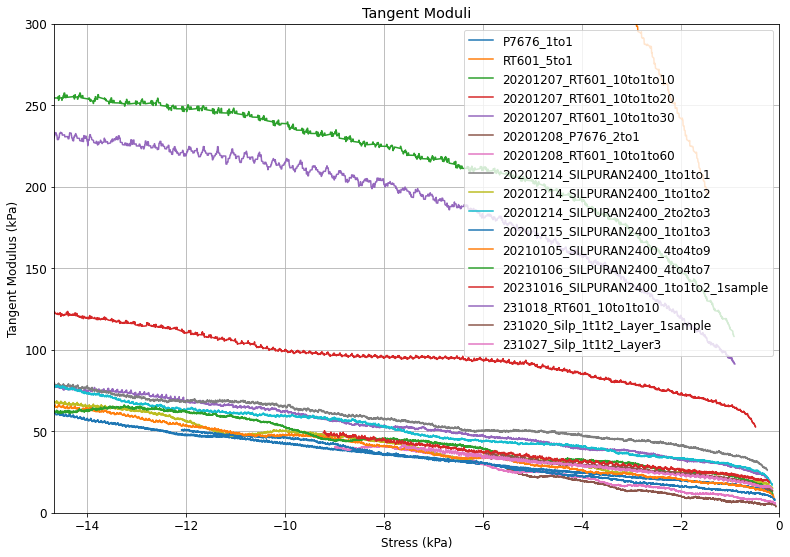

In [19]:
# Tangent Modulus with stress
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
E2 = []

for n in range(0,len(Mixtures)):
    E2.append(-np.gradient(Stresses[n],Strains[n]))
    plt.plot(Stresses[n] / 1000,E2[n] / 1000, label = Mixtures[n])
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
#plt.xlim([-300,0])
plt.xlim([Stresses[0][-1] / 1000,0])
#plt.ylim([0,1500])
plt.ylim([0,300])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Tangent Moduli")
plt.xlabel("Stress (kPa)")
plt.ylabel("Tangent Modulus (kPa)")
plt.grid()
plt.show()

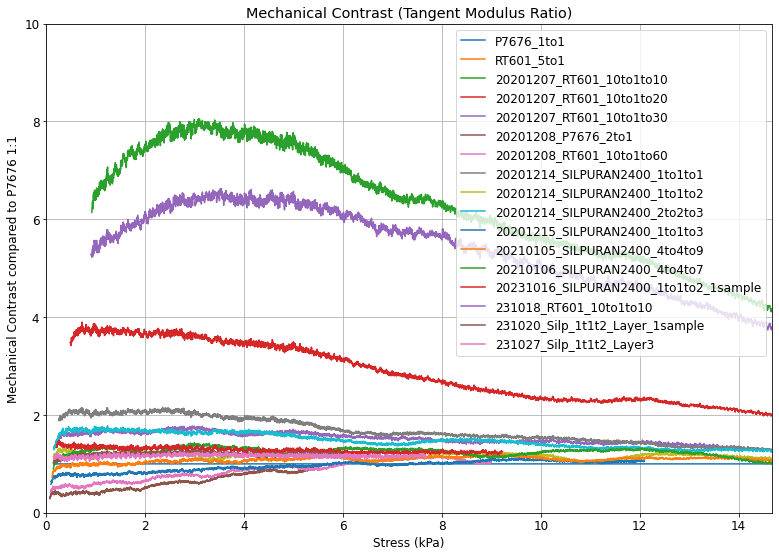

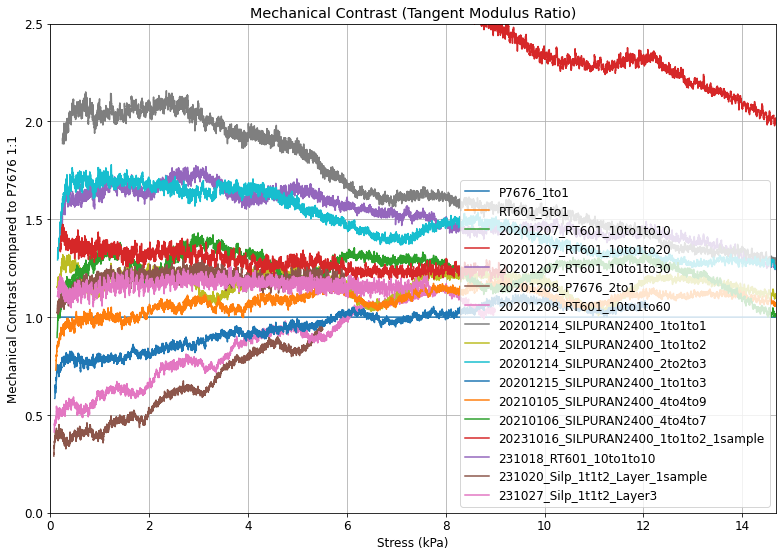

In [20]:
# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    plt.plot(-Stresses[n] / 1000,E2[n] / np.interp(-Stresses[n],-Stresses[0],E2[0]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,-Stresses[0][-1] / 1000])
plt.ylim([0,10])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Stress (kPa)")
plt.ylabel("Mechanical Contrast compared to P7676 1:1")
plt.grid()
plt.show()

# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    plt.plot(-Stresses[n] / 1000,E2[n] / np.interp(-Stresses[n],-Stresses[0],E2[0]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right")
plt.xlim([0,-Stresses[0][-1] / 1000])
plt.ylim([0,2.5])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Stress (kPa)")
plt.ylabel("Mechanical Contrast compared to P7676 1:1")
plt.grid()
plt.show()

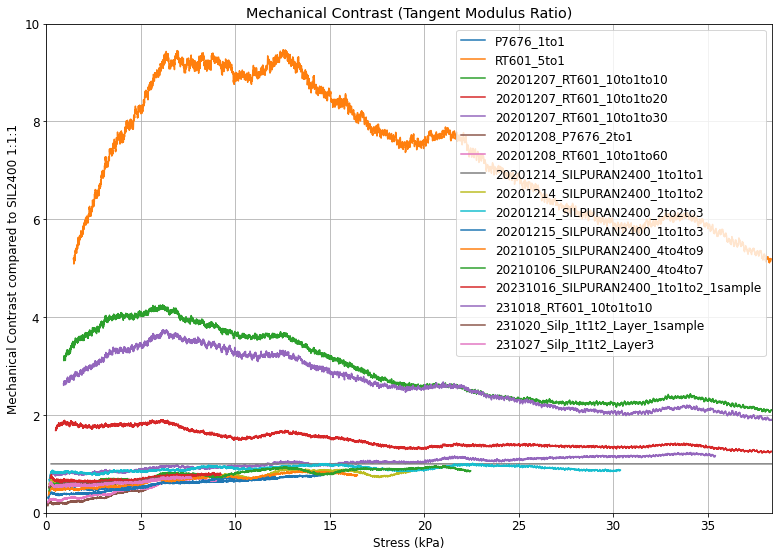

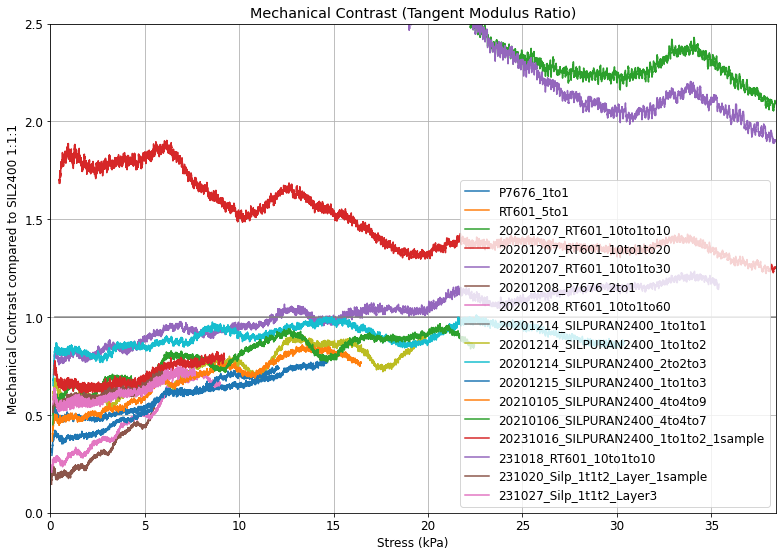

In [21]:
# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    plt.plot(-Stresses[n] / 1000,E2[n] / np.interp(-Stresses[n],-Stresses[7],E2[7]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,-Stresses[7][-1] / 1000])
plt.ylim([0,10])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Stress (kPa)")
plt.ylabel("Mechanical Contrast compared to SIL2400 1:1:1")
plt.grid()
plt.show()

# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    plt.plot(-Stresses[n] / 1000,E2[n] / np.interp(-Stresses[n],-Stresses[7],E2[7]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right")
plt.xlim([0,-Stresses[7][-1] / 1000])
plt.ylim([0,2.5])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Stress (kPa)")
plt.ylabel("Mechanical Contrast compared to SIL2400 1:1:1")
plt.grid()
plt.show()

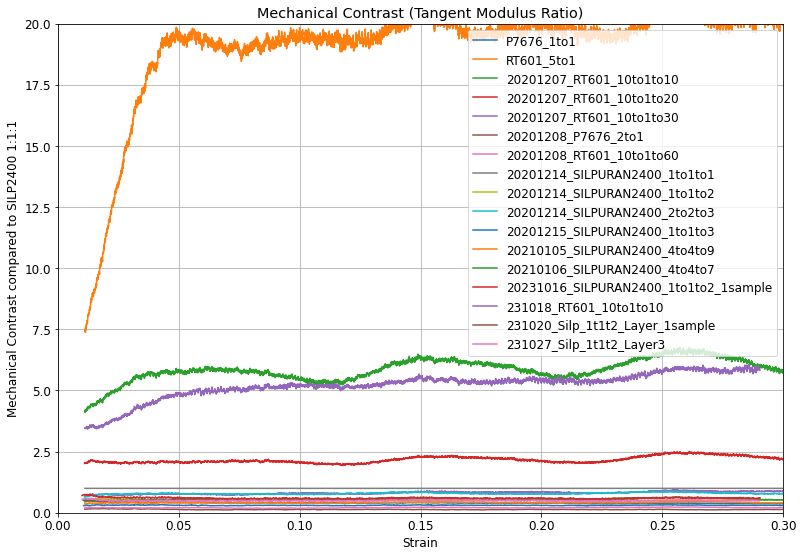

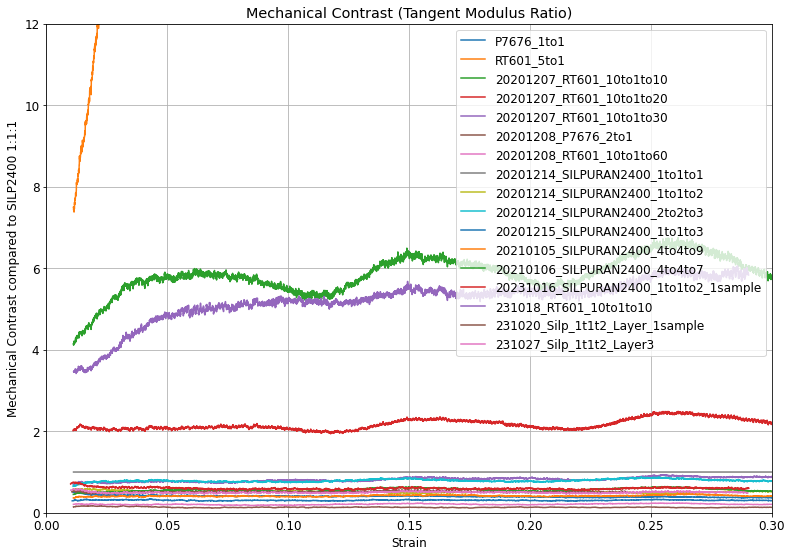

In [22]:
# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    plt.plot(Strains[n],E[n] / np.interp(Strains[n],Strains[7],E[7]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,0.3])
plt.ylim([0,20])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Strain")
plt.ylabel("Mechanical Contrast compared to SILP2400 1:1:1")
plt.grid()
plt.show()

# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

for n in range(0,len(Mixtures)):
    plt.plot(Strains[n],E[n] / np.interp(Strains[n],Strains[7],E[7]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,0.3])
plt.ylim([0,12])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Strain")
plt.ylabel("Mechanical Contrast compared to SILP2400 1:1:1")
plt.grid()
plt.show()

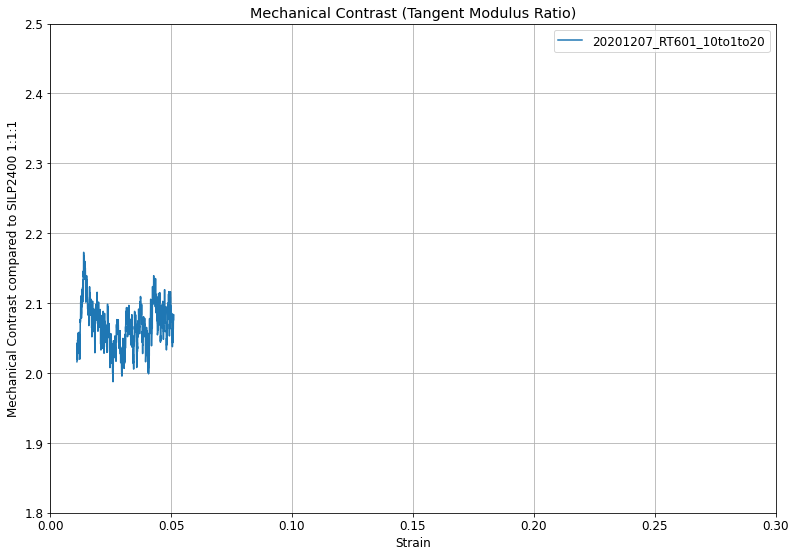

2.0683248950464326


In [23]:
# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

x = 4000;

n = 3;

plt.plot(Strains[n][0:x],E[n][0:x] / np.interp(Strains[n][0:x],Strains[7][0:x],E[7][0:x]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,0.3])
plt.ylim([1.8,2.5])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Strain")
plt.ylabel("Mechanical Contrast compared to SILP2400 1:1:1")
plt.grid()
plt.show()

print(np.mean(E[n][0:x] / np.interp(Strains[n][0:x],Strains[7][0:x],E[7][0:x])))

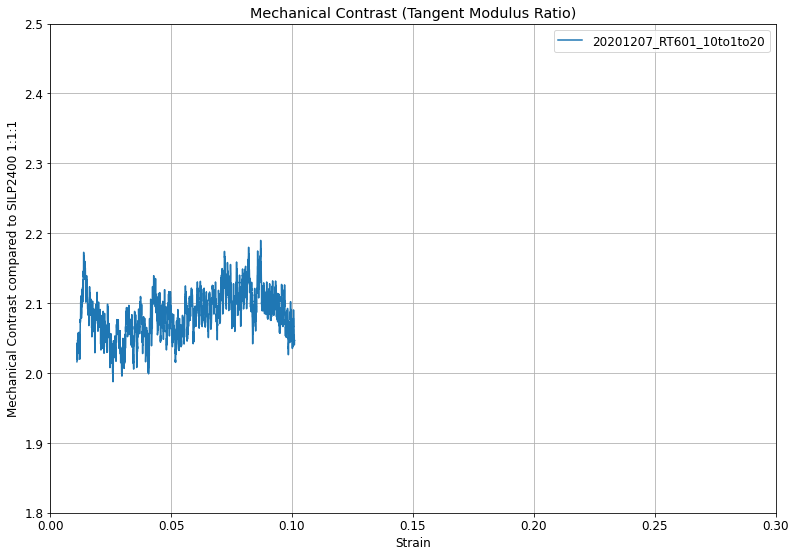

2.0833758752720604


In [24]:
# Contrast
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

x = 9000;

n = 3;

plt.plot(Strains[n][0:x],E[n][0:x] / np.interp(Strains[n][0:x],Strains[7][0:x],E[7][0:x]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')
             
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,0.3])
plt.ylim([1.8,2.5])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Strain")
plt.ylabel("Mechanical Contrast compared to SILP2400 1:1:1")
plt.grid()
plt.show()

print(np.mean(E[n][0:x] / np.interp(Strains[n][0:x],Strains[7][0:x],E[7][0:x])))

In [25]:
2.5*9.8/9.6

2.5520833333333335

In [26]:
4.36*(0.98+0.98+0.96)/3

4.243733333333334

In [27]:
np.pi*2*2*3*0.001 # volume of cylinder in mL, 1 g is 1 mL for water

0.03769911184307752

In [28]:
np.pi*20*20*3.5*0.001 - np.pi*2*2*3*0.001

4.360530603182633

In [29]:
np.pi*20*20*1.5*0.001

1.8849555921538759

In [30]:
2.5*0.0377

0.09425

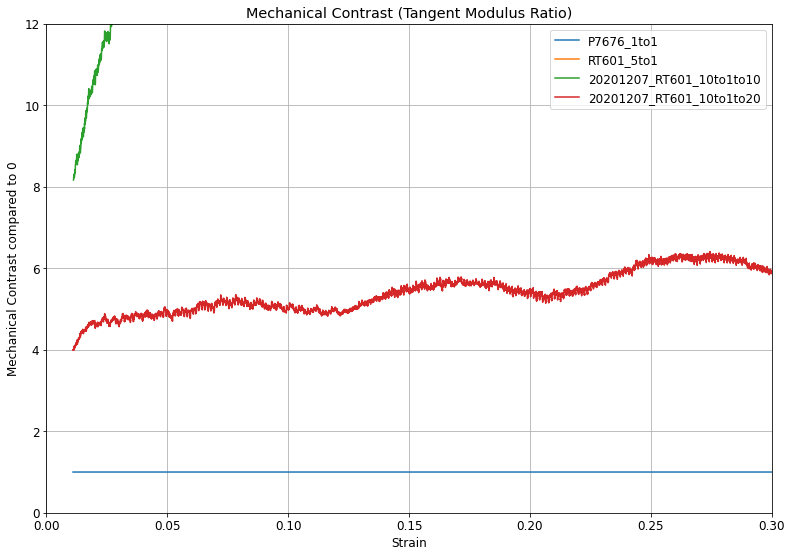

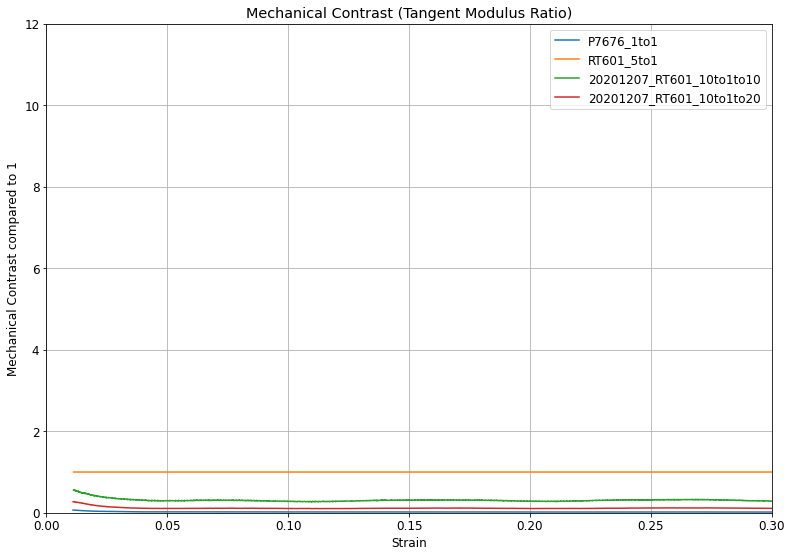

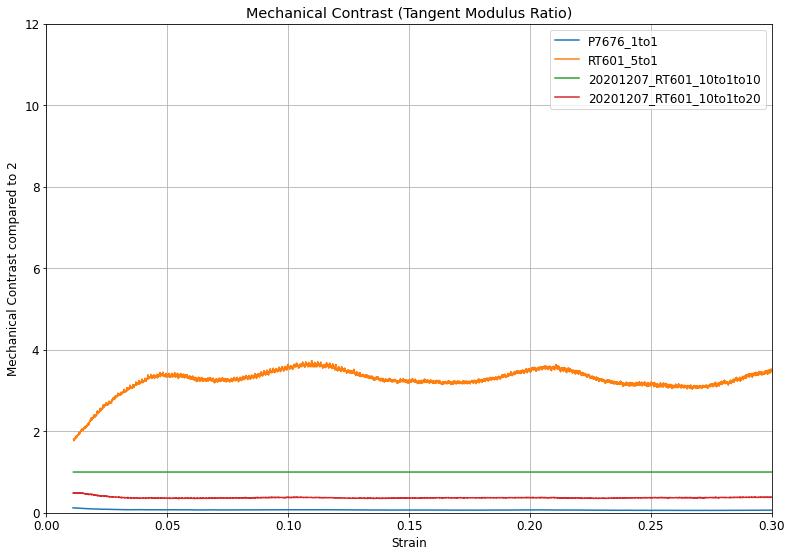

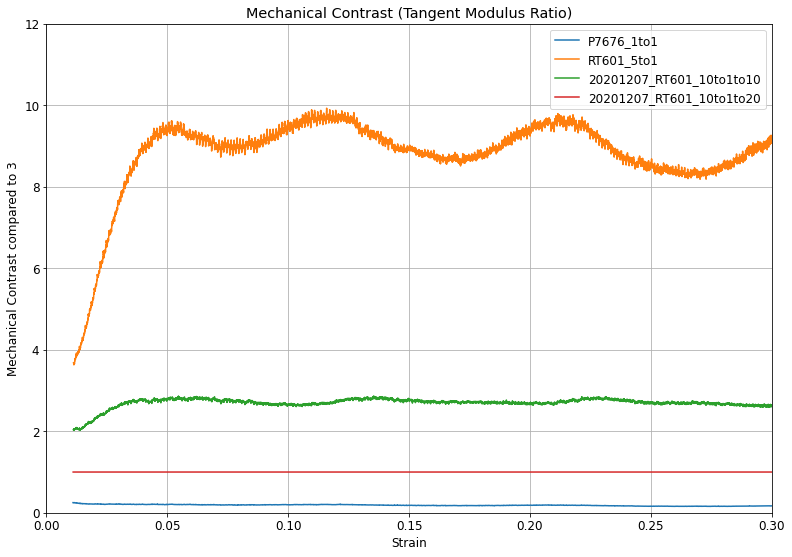

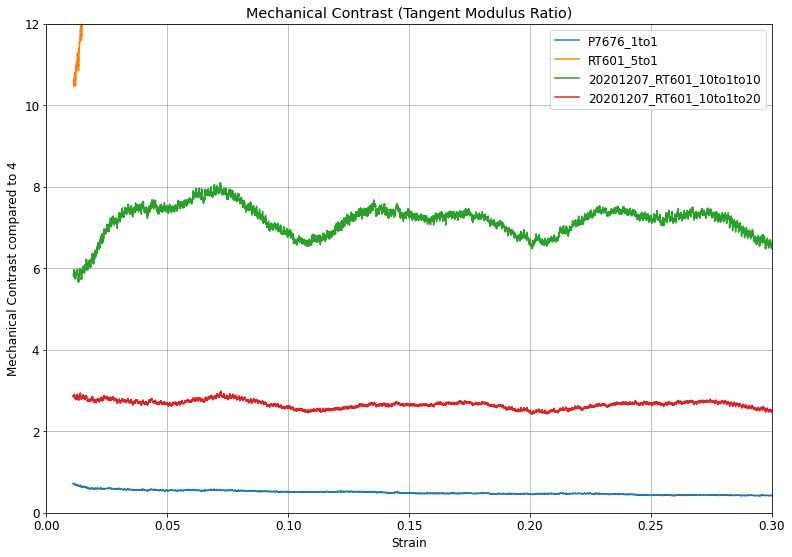

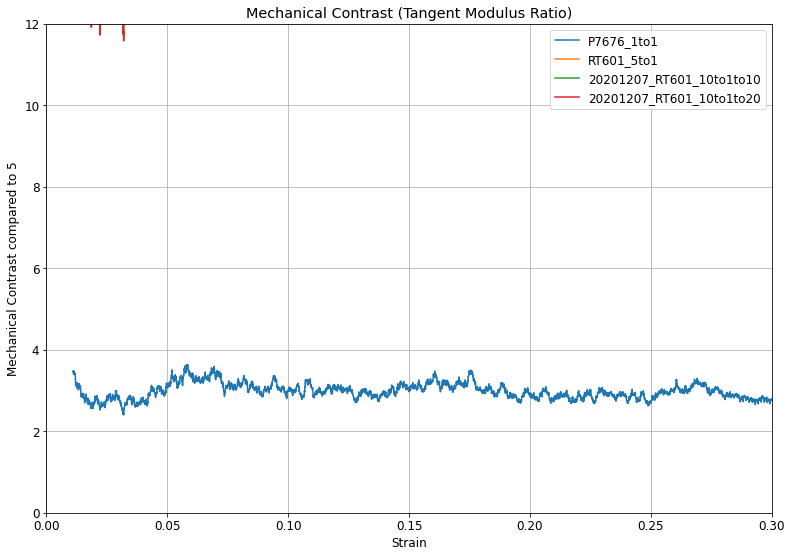

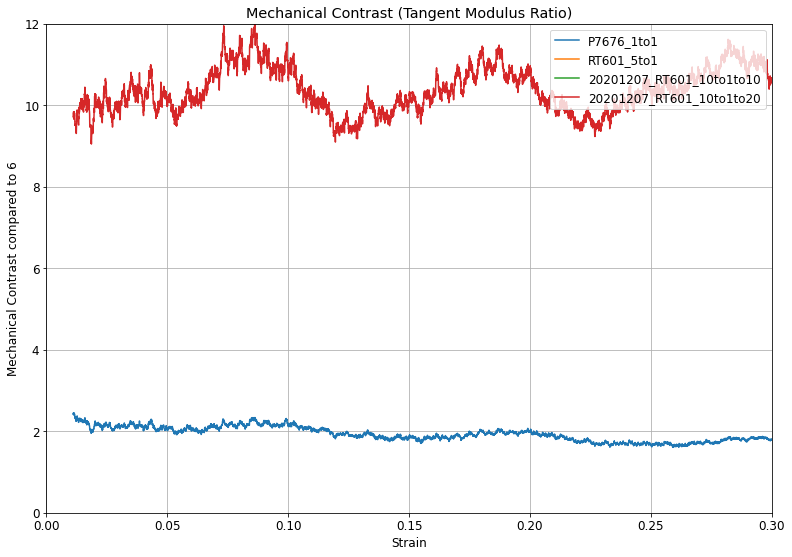

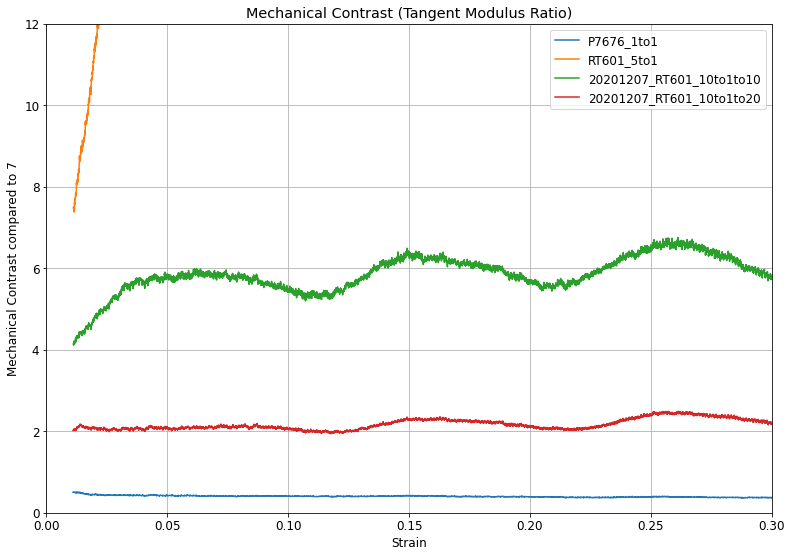

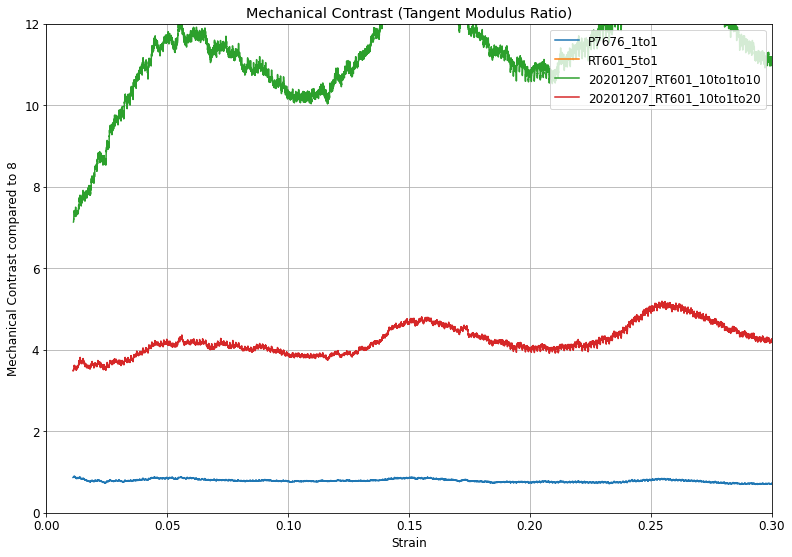

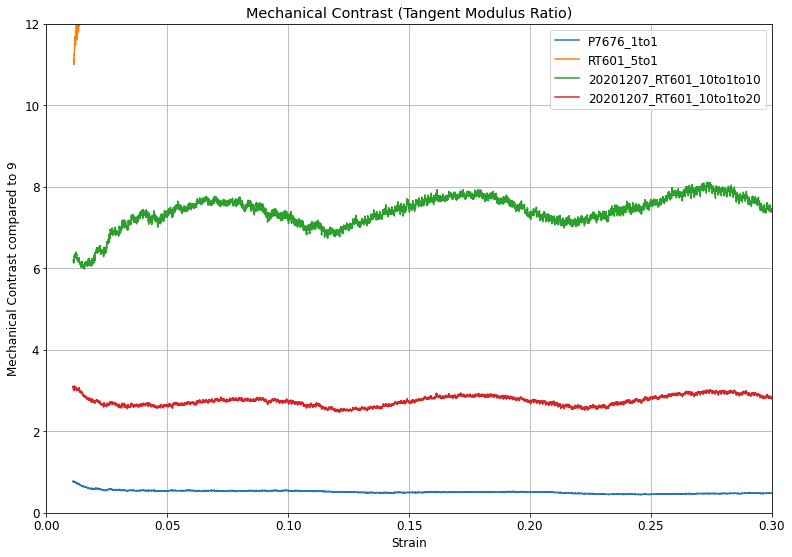

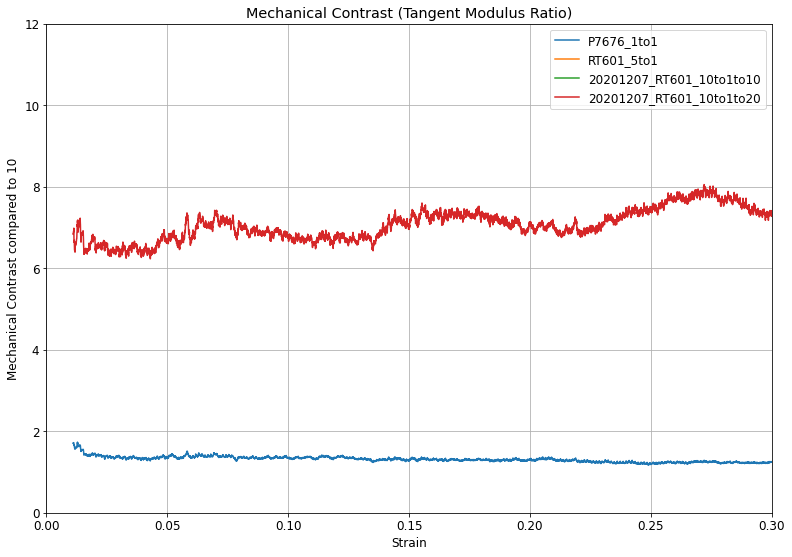

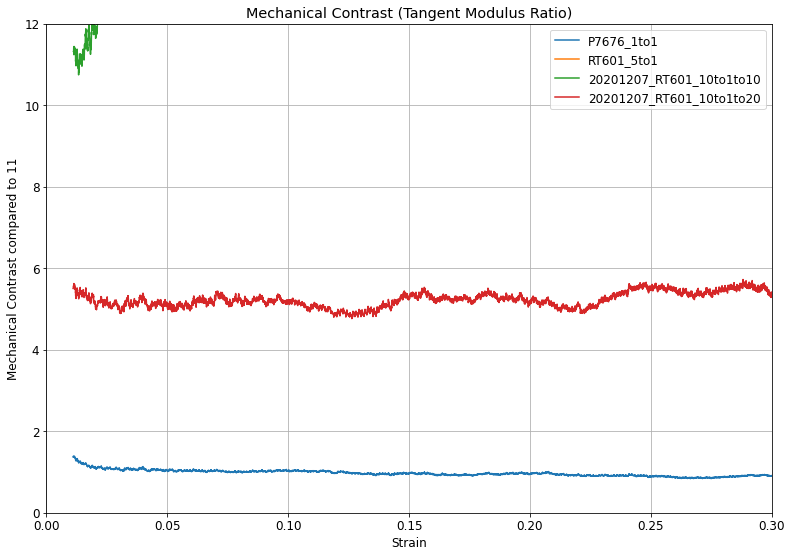

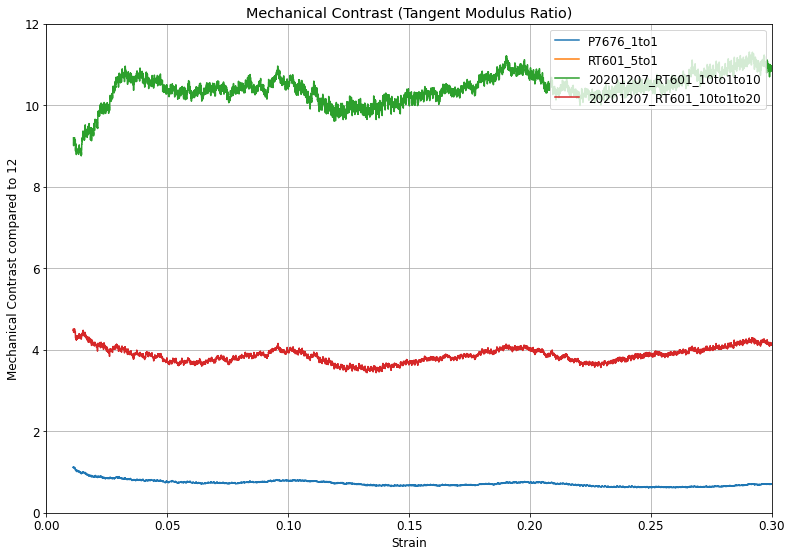

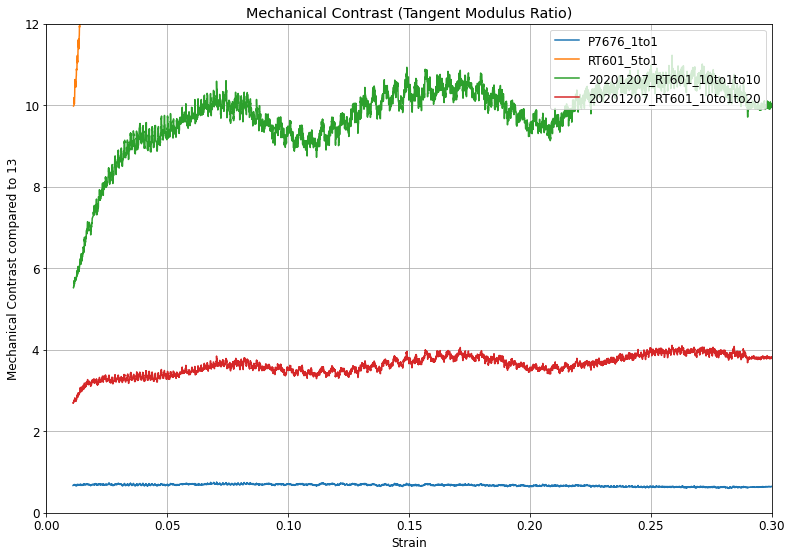

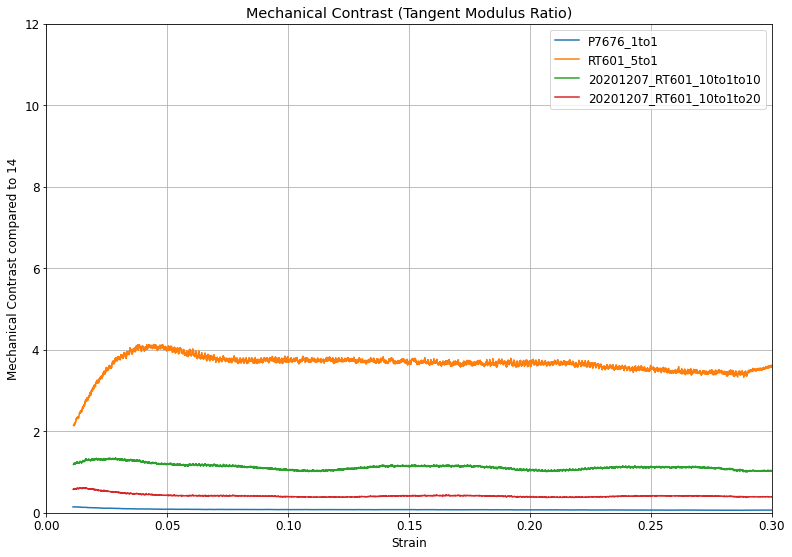

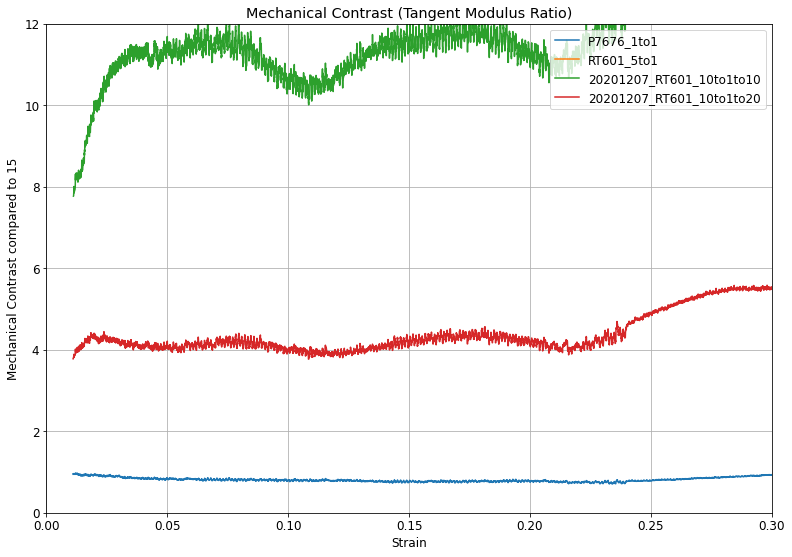

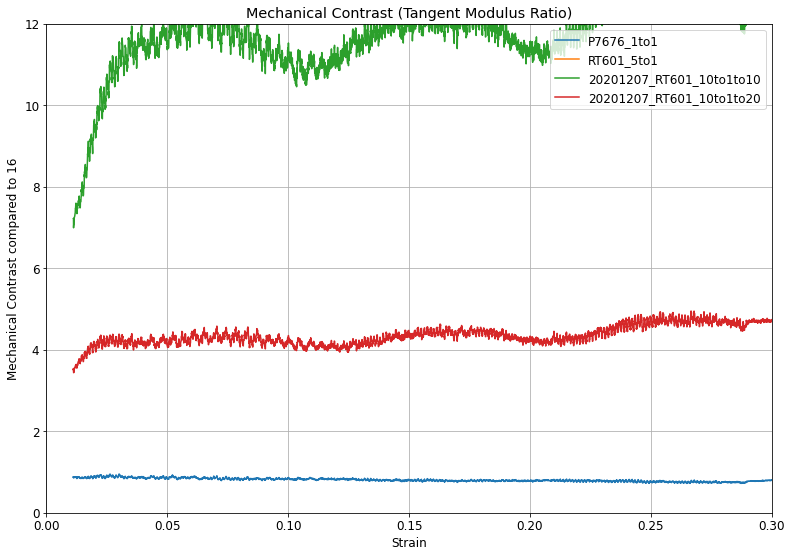

In [31]:
plt.rcParams.update({'font.size': 12})

for n2 in range(0,len(Mixtures)):
    plt.figure(figsize=(13,9))
    ax = plt.subplot(1,1,1)
    for n in range(0,4): #len(Mixtures)):
        plt.plot(Strains[n],E[n] / np.interp(Strains[n],Strains[n2],E[n2]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
        #plt.plot(-Strains[n],E[n], label = Mixtures[n])
        #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')

    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels, loc = "upper right")
    plt.xlim([0,0.3])
    plt.ylim([0,12])
    #ax.set_yscale('log')
    #plt.ylim([-1,1])
    plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
    plt.xlabel("Strain")
    plt.ylabel("Mechanical Contrast compared to "+str(n2))
    plt.grid()
    plt.show()

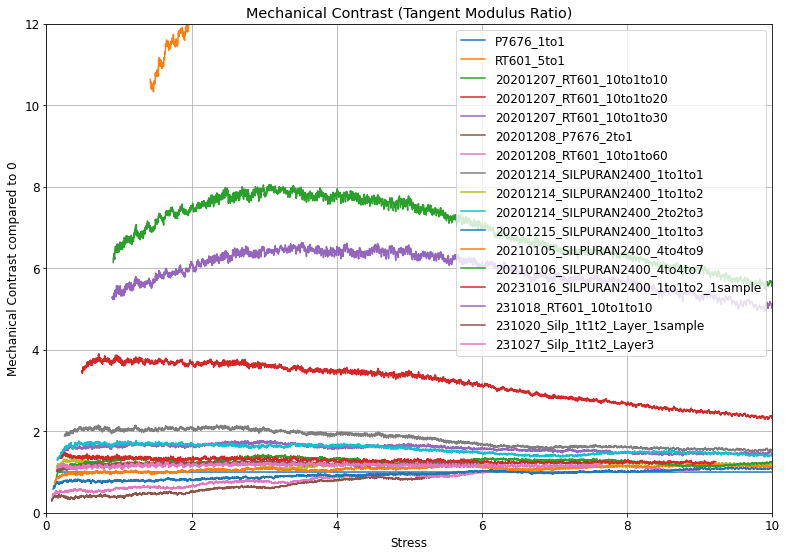

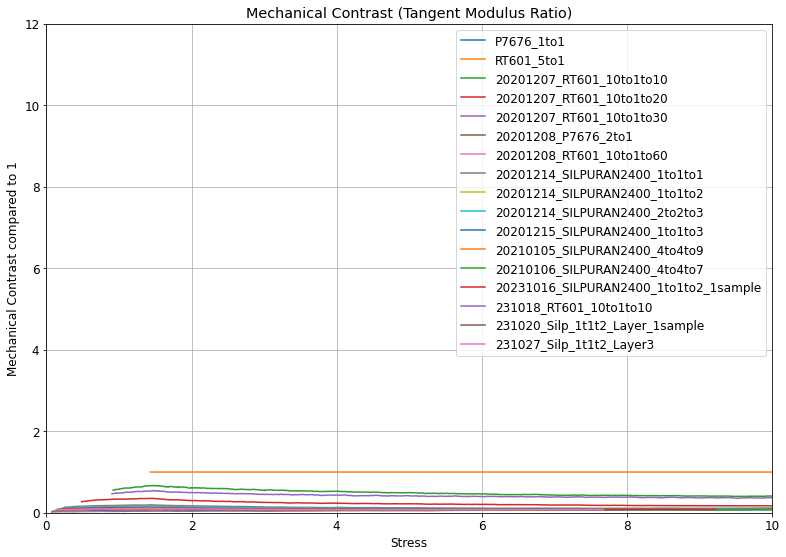

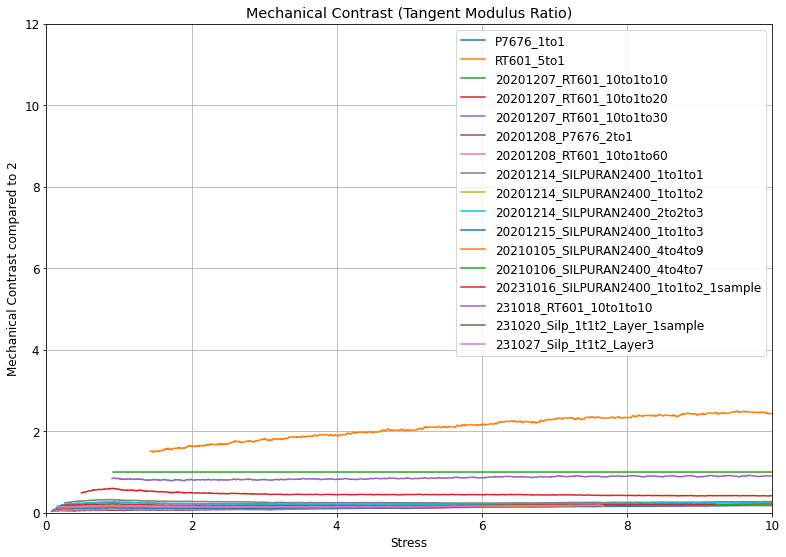

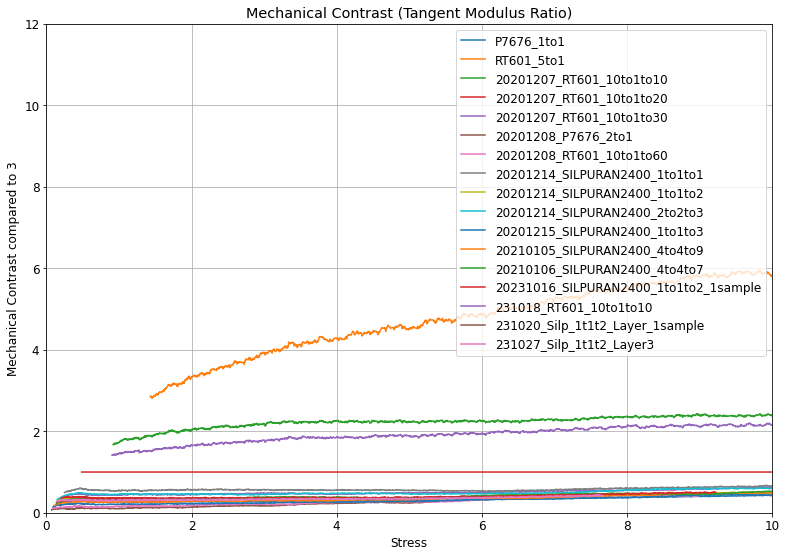

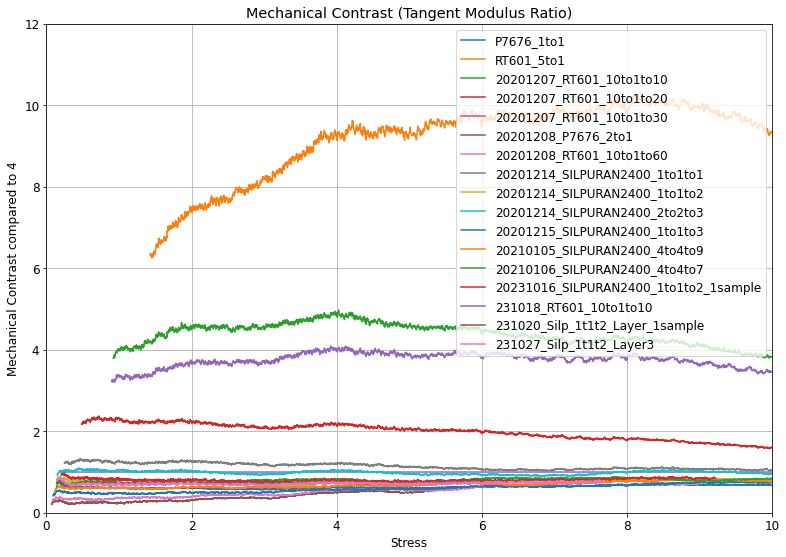

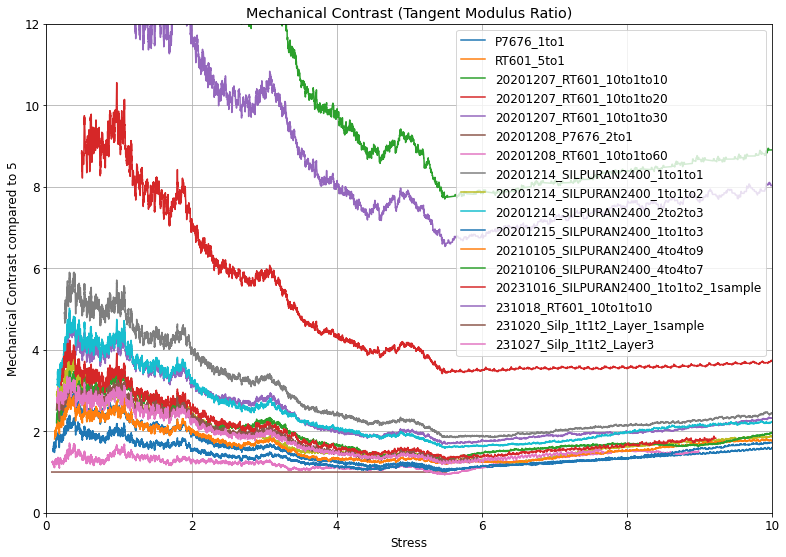

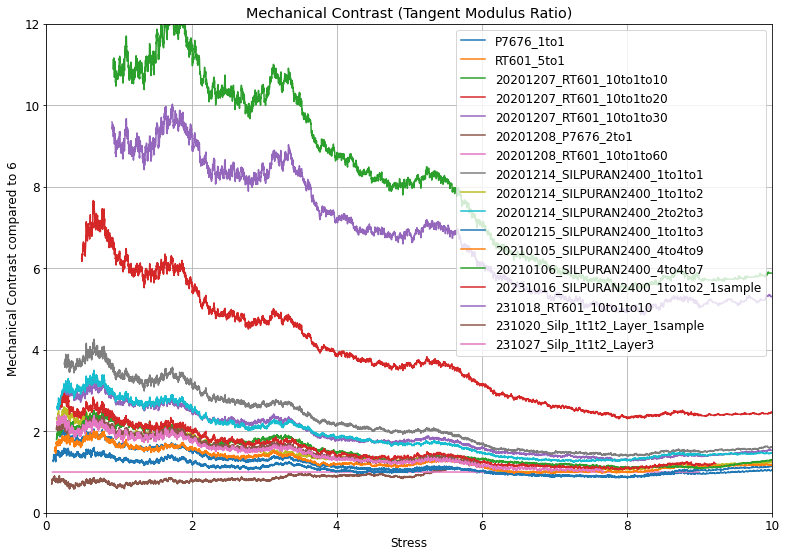

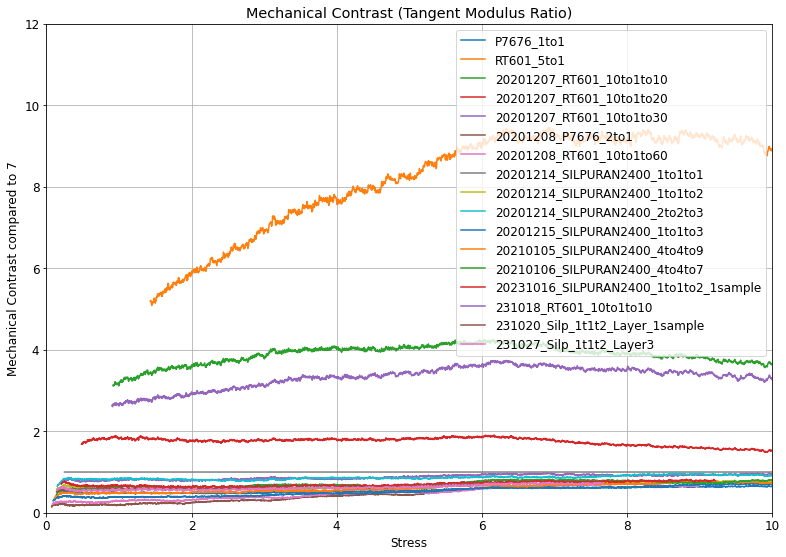

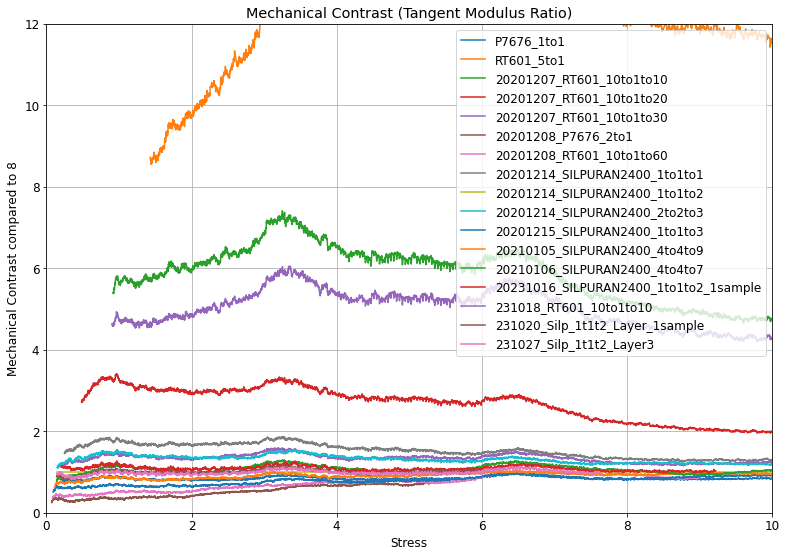

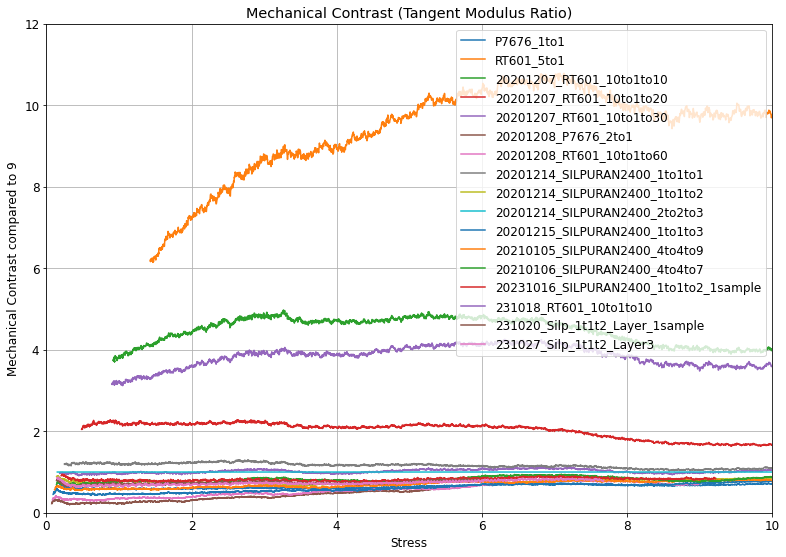

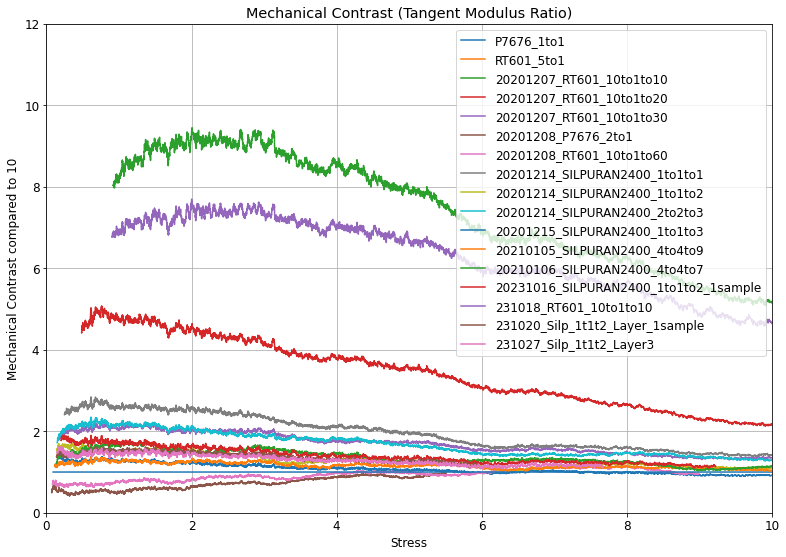

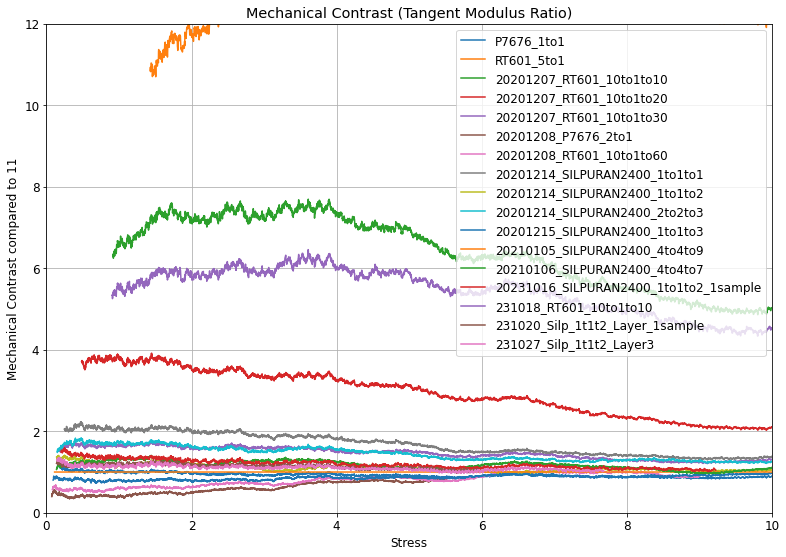

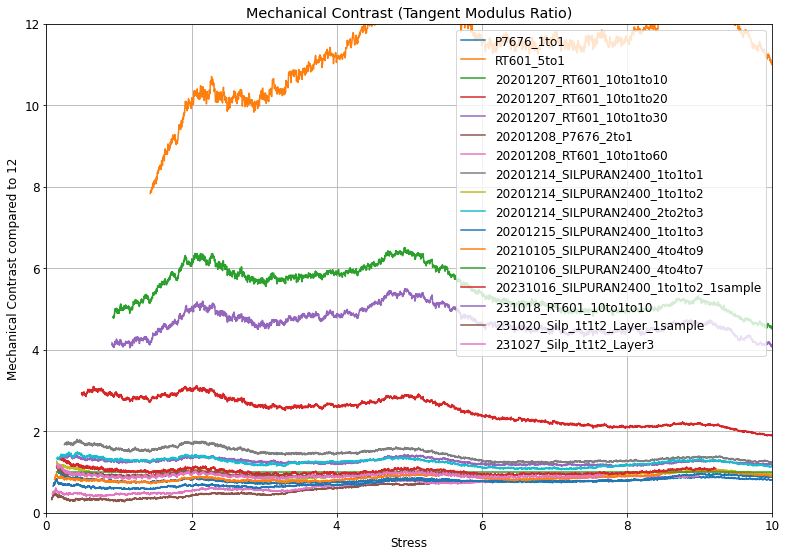

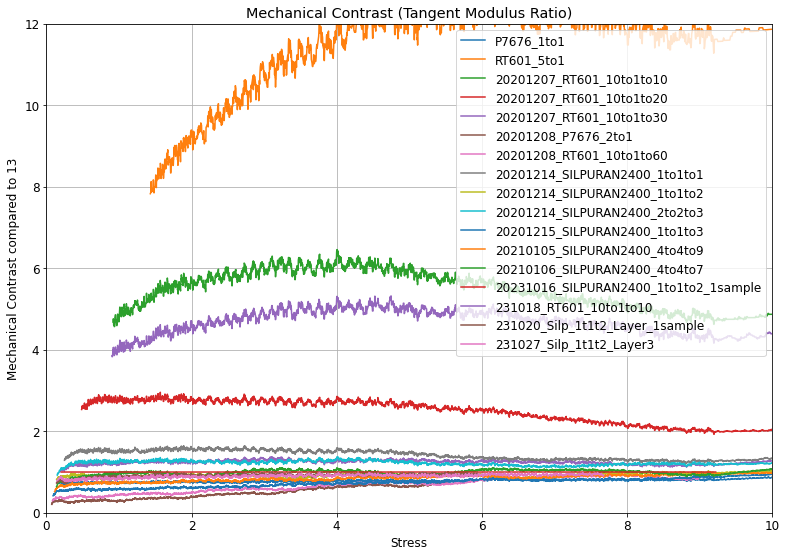

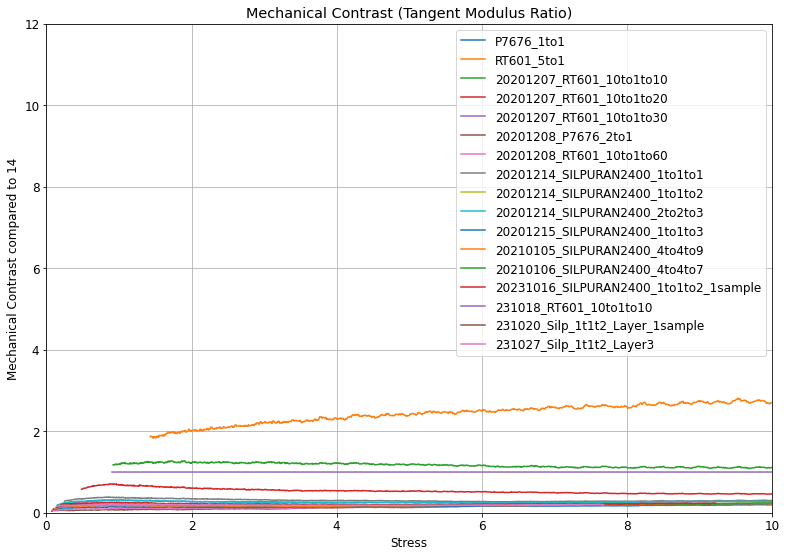

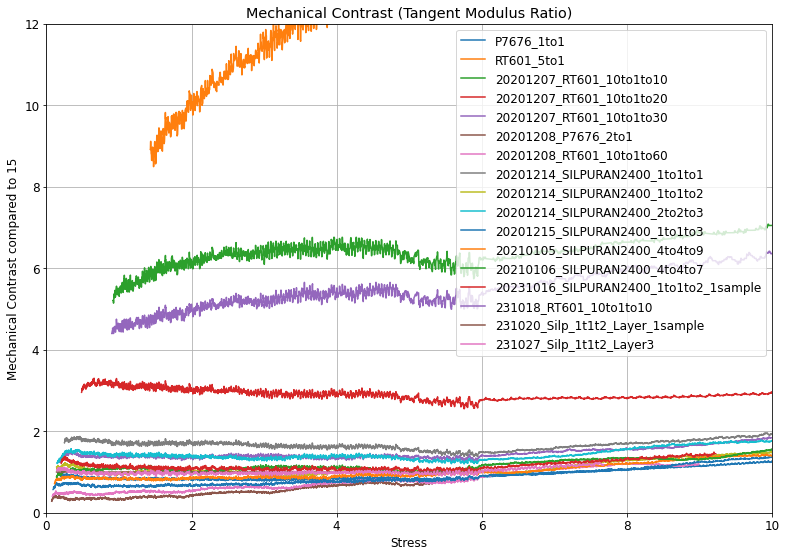

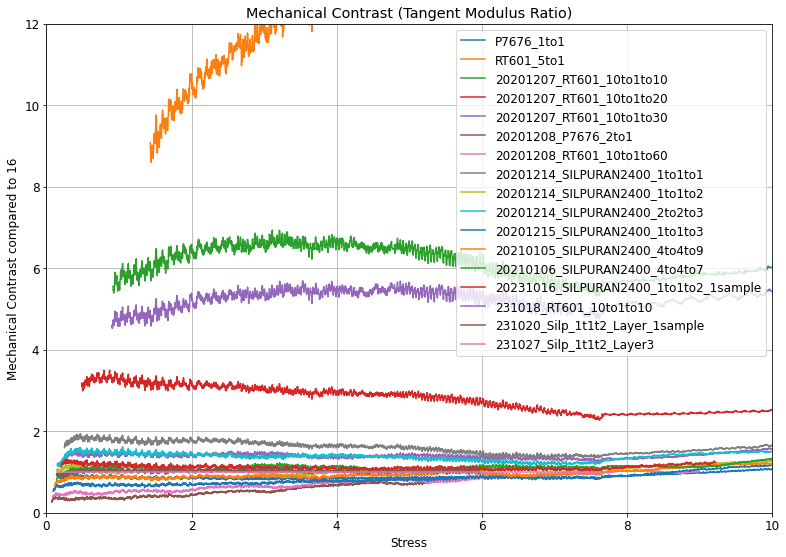

In [32]:
plt.rcParams.update({'font.size': 12})

for n2 in range(0,len(Mixtures)):
    plt.figure(figsize=(13,9))
    ax = plt.subplot(1,1,1)
    for n in range(0,len(Mixtures)):
        plt.plot(-Stresses[n] / 1000,E2[n] / np.interp(-Stresses[n],-Stresses[n2],E2[n2]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
        #plt.plot(-Strains[n],E[n], label = Mixtures[n])
        #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')

    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels, loc = "upper right")
    plt.xlim([0,10])
    plt.ylim([0,12])
    #ax.set_yscale('log')
    #plt.ylim([-1,1])
    plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
    plt.xlabel("Stress")
    plt.ylabel("Mechanical Contrast compared to "+str(n2))
    plt.grid()
    plt.show()

In [33]:
Mixtures[6] # Probably the most versatile we'll get

'20201208_RT601_10to1to60'

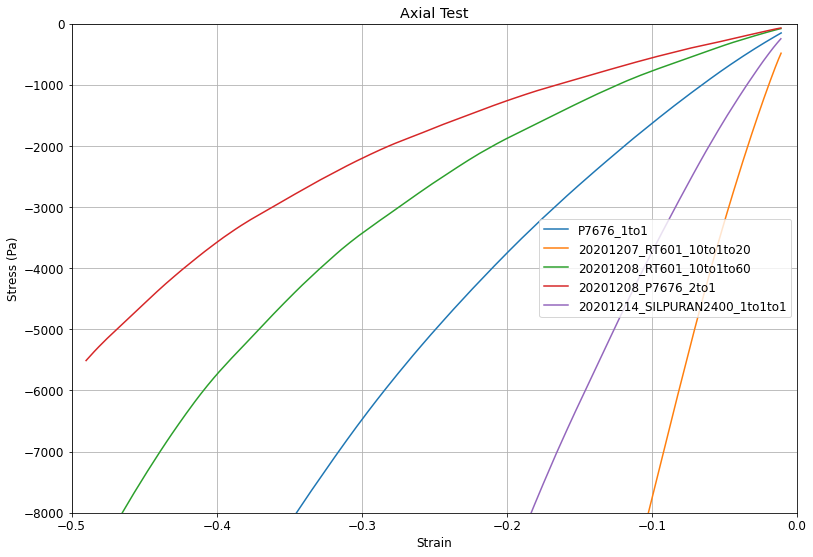

In [34]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(-Strains[0],Stresses[0], label = Mixtures[0])
plt.plot(-Strains[3],Stresses[3], label = Mixtures[3])
plt.plot(-Strains[6],Stresses[6], label = Mixtures[6])
plt.plot(-Strains[5],Stresses[5], label = Mixtures[5])
plt.plot(-Strains[7],Stresses[7], label = Mixtures[7])
#plt.plot(-Strains[0],-Strains[0]*25000, label = "25 kPa")
#plt.plot(-Strains[0],-Strains[0]*16300, label = "16.3 kPa")
#plt.plot(-Strains[0],-Strains[0]*14750, label = "14.75 kPa")


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-8000,0])
plt.xlim([-0.50,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

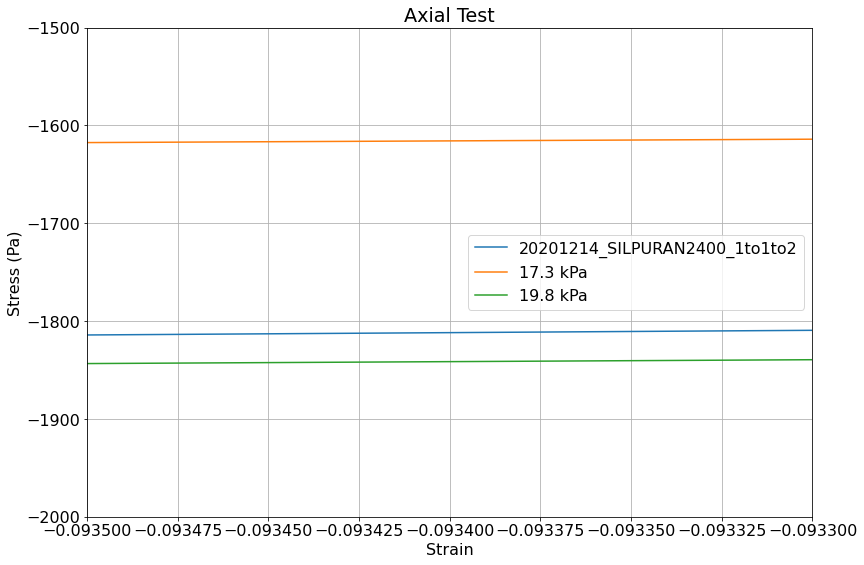

In [35]:
plt.figure(figsize=(13,9))
plt.rcParams.update({'font.size': 16})
ax = plt.subplot(1,1,1)

plt.plot(-Strains[8],Stresses[8], label = Mixtures[8])
#plt.plot(-Strains[2],Stresses[2], label = Mixtures[2])

plt.plot(-Strains[8],-Strains[8]*17300, label = "17.3 kPa")
plt.plot(-Strains[8],-Strains[8]*19715.5, label = "19.8 kPa")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-2000,-1500])
plt.xlim([-0.0935,-0.0933])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

In [36]:
-1735*(1+(-0.0934))

-1572.951

In [37]:
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[8]-NE_s))
    return Stresses[8][index]

NE = -0.093
print(ns22(NE))

ns22(NE)*(1+(NE))/(np.log(NE+1)) # True Stress/True Strain -> Elasticity for simulation

-1802.1881052248168


16745.592053950877

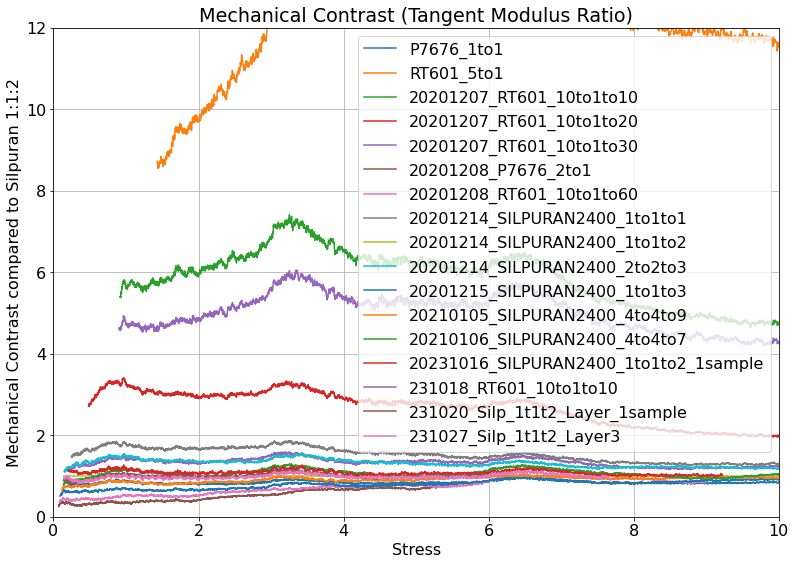

In [38]:
plt.rcParams.update({'font.size': 16})

n2 = 8;
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
for n in range(0,len(Mixtures)):
    plt.plot(-Stresses[n] / 1000,E2[n] / np.interp(-Stresses[n],-Stresses[n2],E2[n2]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,10])
plt.ylim([0,12])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Stress")
plt.ylabel("Mechanical Contrast compared to Silpuran 1:1:2")
plt.grid()
plt.show()

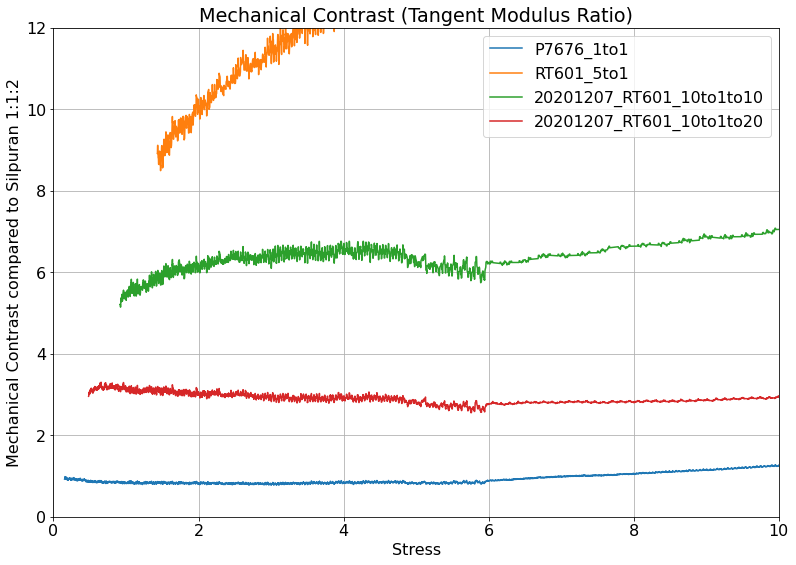

In [39]:
plt.rcParams.update({'font.size': 16})

n2 = 15;
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
for n in range(0,4): #len(Mixtures)):
    plt.plot(-Stresses[n] / 1000,E2[n] / np.interp(-Stresses[n],-Stresses[n2],E2[n2]), label = Mixtures[n]) # Need to do gradient and interp with positive strains
    #plt.plot(-Strains[n],E[n], label = Mixtures[n])
    #plt.plot(-Strains[n],np.interp(Strains[n],Strains[0],E[0]), label = Mixtures[n]+' interp')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,10])
plt.ylim([0,12])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Stress")
plt.ylabel("Mechanical Contrast compared to Silpuran 1:1:2")
plt.grid()
plt.show()

In [40]:
# np. set_printoptions(threshold=np. inf, suppress=True, linewidth=np. inf)
# print(str(np.transpose(np.array([Stresses[8][::-1]]))).replace(' [', '').replace('[', '').replace(']', ''))

In [41]:
# Check all ascending
c = 0;
for n in range(0,len(Strains[8])):
    if n < len(Strains[8]) - 1:
        if Strains[8][n] > Strains[8][n+1]:
            c = c + 1
print(c)

0


In [42]:
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[8]-NE_s))
    return Stresses[8][index]

NE = -0.09 # negative for compressive
print(ns22(NE))

ns22(NE)*(1+(NE))/(np.log(NE+1)) # True Stress/True Strain -> Elasticity for simulation

-1731.361767921148


16705.840925350167

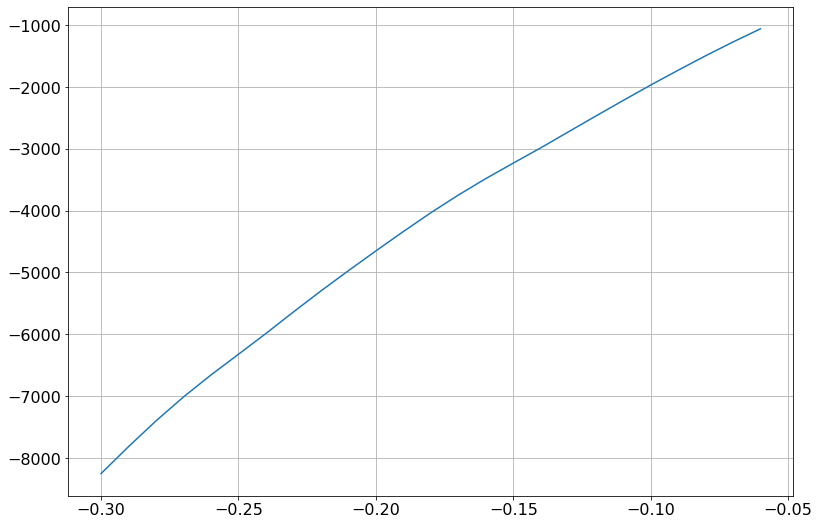

In [43]:
NE = np.arange(-0.3,-0.05,0.01) # negative for compressive
# print(ns22(NE))
y = np.array([])
for ne in NE:
    y = np.append(y,ns22(ne)) # Stress

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(NE,y)
plt.grid()
plt.show()

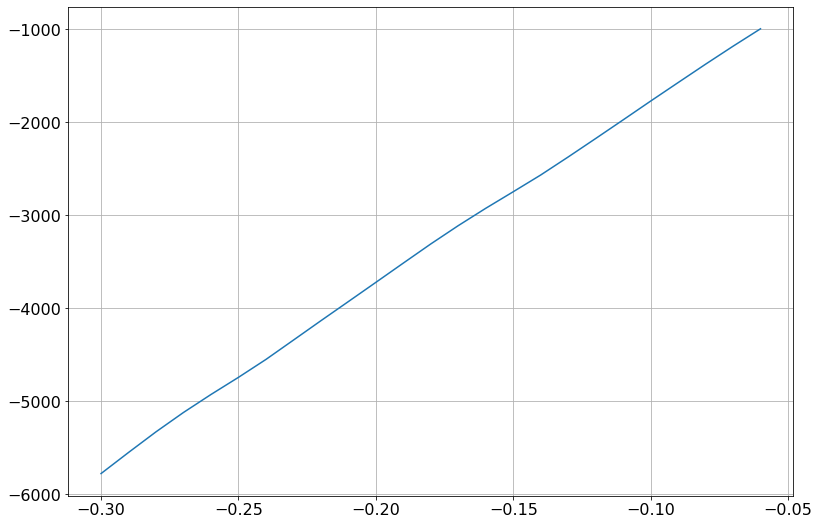

In [44]:
NE = np.arange(-0.3,-0.05,0.01) # negative for compressive
# print(ns22(NE))
y = np.array([])
for ne in NE:
    y = np.append(y,ns22(ne)*(1+ne)) # True Stress

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(NE,y)
plt.grid()
plt.show()

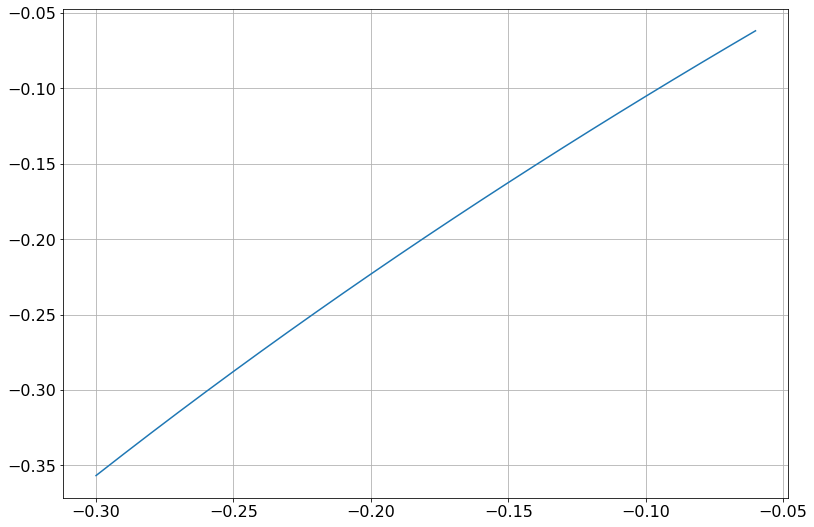

In [45]:
NE = np.arange(-0.3,-0.05,0.01) # negative for compressive
# print(ns22(NE))
y = np.array([])
for ne in NE:
    y = np.append(y,np.log(1+ne)) # True Strain

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(NE,y)
plt.grid()
plt.show()

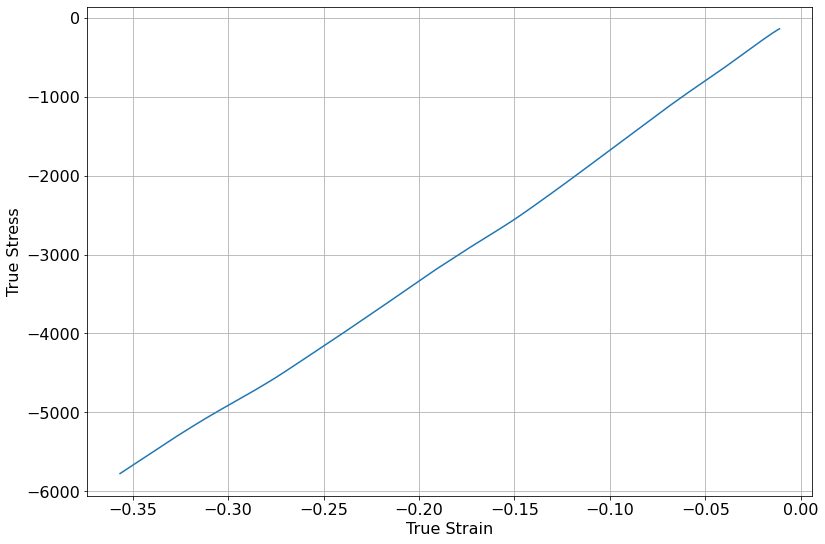

In [46]:
NE = np.arange(-0.3,-0.01,0.001) # negative for compressive
# print(ns22(NE))
y = np.array([])
for ne in NE:
    y = np.append(y,ns22(ne)*(1+ne))

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
plt.plot(np.log(1+NE),y) # True Strain, True Stress
plt.xlabel("True Strain")
plt.ylabel("True Stress")
plt.grid()
plt.show()

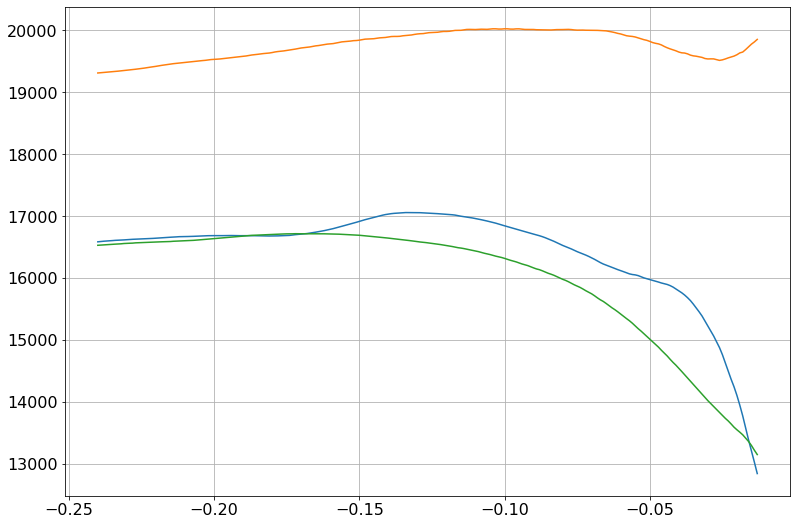

In [47]:
NE = np.arange(-0.24,-0.012,0.001) # negative for compressive
# print(ns22(NE))
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
y = np.array([])
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[8]-NE_s))
    return Stresses[8][index]
for ne in NE:
    y = np.append(y,ns22(ne)*(1+ne)/np.log(1+ne)) # True Stress/True Strain -> Elasticity for simulation
plt.plot(NE,y)
y = np.array([])
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[13]-NE_s))
    return Stresses[13][index]
for ne in NE:
    y = np.append(y,ns22(ne)*(1+ne)/np.log(1+ne)) # True Stress/True Strain -> Elasticity for simulation
plt.plot(NE,y)
y = np.array([])
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[15]-NE_s))
    return Stresses[15][index]
for ne in NE:
    y = np.append(y,ns22(ne)*(1+ne)/np.log(1+ne)) # True Stress/True Strain -> Elasticity for simulation
plt.plot(NE,y)
plt.grid()
plt.show()

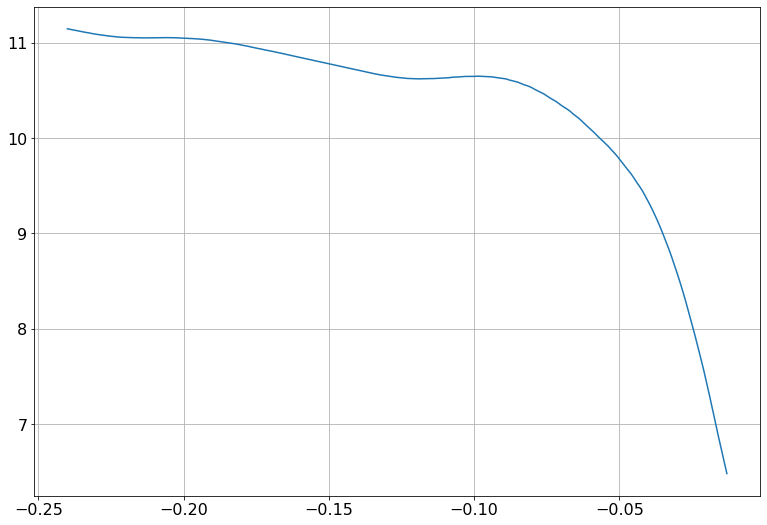

In [48]:
NE = np.arange(-0.24,-0.012,0.001) # negative for compressive
# print(ns22(NE))
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
y1 = np.array([])
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[2]-NE_s))
    return Stresses[2][index]
for ne in NE:
    y1 = np.append(y1,ns22(ne)*(1+ne)/np.log(1+ne)) # True Stress/True Strain -> Elasticity for simulation
y2 = np.array([])
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[15]-NE_s))
    return Stresses[15][index]
for ne in NE:
    y2 = np.append(y2,ns22(ne)*(1+ne)/np.log(1+ne)) # True Stress/True Strain -> Elasticity for simulation
plt.plot(NE,y1/y2)
plt.grid()
plt.show()

In [49]:
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[2]-NE_s))
    return Stresses[2][index]

NE = -0.04 # negative for compressive
print(ns22(NE))

ns22(NE)*(1+(NE))/(np.log(NE+1)) # True Stress/True Strain -> Elasticity for simulation

-5767.66409690545


135636.62427816674

In [50]:
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[15]-NE_s))
    return Stresses[15][index]

NE = -0.1005 # negative for compressive
print(ns22(NE))

ns22(NE)*(1+(NE))/(np.log(NE+1)) # True Stress/True Strain -> Elasticity for simulation

-1921.7149319900307


16320.281162501607

In [51]:
108638/19976

5.4384261113336

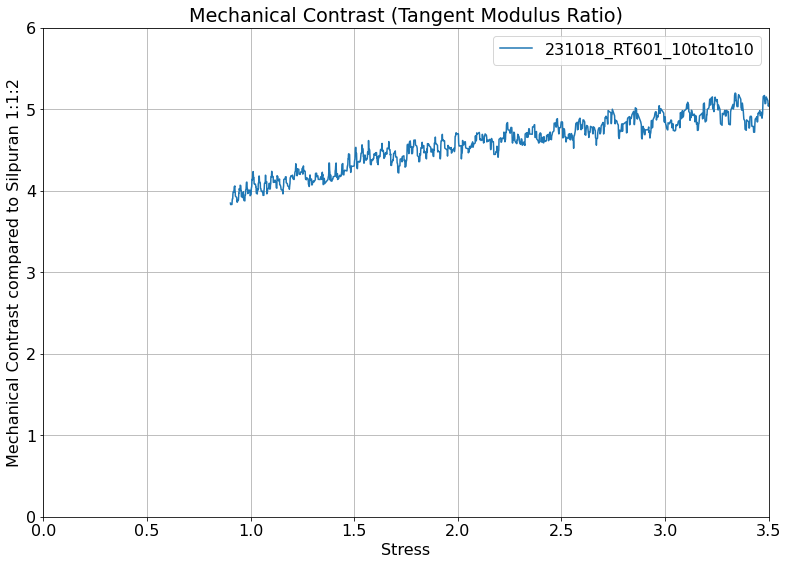

4.5937754431947395


In [52]:
plt.rcParams.update({'font.size': 16})

n = 14;
n2 = 13;
k = 2467;

plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
Mech_Con = E2[n] / np.interp(-Stresses[n],-Stresses[n2],E2[n2]);
plt.plot(-Stresses[n][0:k] / 1000,Mech_Con[0:k], label = Mixtures[n]) # Need to do gradient and interp with positive strains

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")
plt.xlim([0,3.5])
plt.ylim([0,6])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Mechanical Contrast (Tangent Modulus Ratio)")
plt.xlabel("Stress")
plt.ylabel("Mechanical Contrast compared to Silpuran 1:1:2")
plt.grid()
plt.show()
print(np.mean(Mech_Con[0:k]))

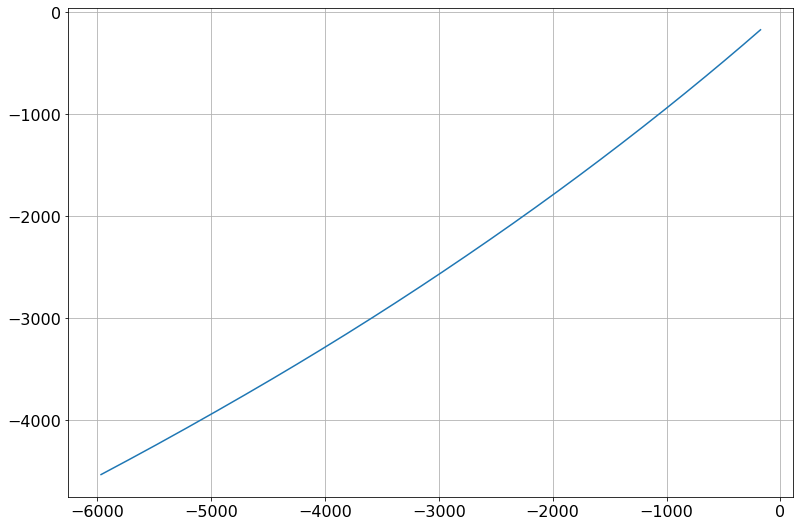

In [53]:
NE = np.arange(-0.24,-0.012,0.001) # negative for compressive
# print(ns22(NE))
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
sn2 = np.array([])
s2 = np.array([])
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[15]-NE_s))
    return Stresses[15][index]
for ne in NE:
    sn2 = np.append(sn2,ns22(ne)) # Stress
for ne in NE:
    s2 = np.append(s2,ns22(ne)*(1+ne)) # True Stress
plt.plot(sn2,s2)
    
#plt.plot(NE,y1/y2)
plt.grid()
plt.show()

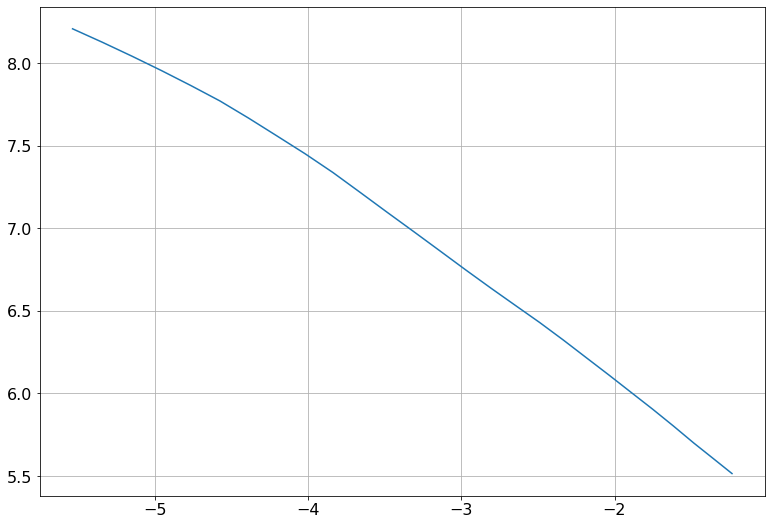

6.110164801308064


In [54]:
NE = np.arange(-0.24,-0.012,0.001) # negative for compressive
# print(ns22(NE))
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)
y1 = np.array([])
s1 = np.array([])
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[2]-NE_s))
    return Stresses[2][index]
for ne in NE:
    y1 = np.append(y1,ns22(ne)*(1+ne)/np.log(1+ne)) # True Stress/True Strain -> Elasticity for simulation
for ne in NE:
    s1 = np.append(s1,ns22(ne)*(1+ne)) # True Stress
y2 = np.array([])
s2 = np.array([])
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[15]-NE_s))
    return Stresses[15][index]
for ne in NE:
    y2 = np.append(y2,ns22(ne)*(1+ne)/np.log(1+ne)) # True Stress/True Strain -> Elasticity for simulation
for ne in NE:
    s2 = np.append(s2,ns22(ne)*(1+ne)) # True Stress
    
Mech_Con = y1 / np.interp(s1,s2,y2);
k = 200
plt.plot(s1[k:-1] / 1000,Mech_Con[k:-1])
    
#plt.plot(NE,y1/y2)
plt.grid()
plt.show()

index = np.argmin(np.abs(s1[k:-1]/ 1000+2.1))
print(Mech_Con[k:-1][index])

In [55]:
MooneyRivlin = [-278.206618,2700.3173,0] # UseHyperelasticLayer = 2;
C10 = MooneyRivlin[0]
C01 = MooneyRivlin[1]
def s22(NE_s):
    s22s = []
    for NE in NE_s:
        l = NE + 1
        stress = 2*(l*l-1/l)*(C10+C01/l)
        s22s.append(stress*l)
    return s22s
ne = np.array([-0.10])
s22(ne)*(1+ne)/np.log(1+ne)

array([12603.03995334])

In [56]:
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[2]-NE_s))
    return Stresses[2][index]

NE = -0.10 # negative for compressive
print(ns22(NE))

ns22(NE)*(1+(NE))/(np.log(NE+1)) # True Stress/True Strain -> Elasticity for simulation

-20331.075550196976


173670.0687248211

In [57]:
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[15]-NE_s))
    return Stresses[15][index]

NE = -0.10 # negative for compressive
print(ns22(NE))
print(ns22(NE)*(1+(NE)))

ns22(NE)*(1+(NE))/(np.log(NE+1)) # True Stress/True Strain -> Elasticity for simulation

-1909.8654545557895
-1718.8789091002106


16314.260597229058

In [58]:
print("Background: ")
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[15]-NE_s))
    return Stresses[15][index]

imax = 10
NE = -0.10 # nominal strain of interest, make sure get same stress as other material at its nominal strain
rNE = np.arange(NE/imax,NE+NE/imax,NE/imax)
rE = np.zeros(imax)
print("Nominal Stress of ",ns22(NE),"Pa at ",-100*NE,"% strain.")

for i in range(0,imax):
    rE[i] = ns22(rNE[i])*(1+(rNE[i]))/(np.log(rNE[i]+1))
print(rE)
print("Prev E of ", ns22(NE)*(1+(NE))/(np.log(NE+1)),", new E of ",np.mean(rE))

print("\nInclusion: ")
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[2]-NE_s))
    return Stresses[2][index]

imax = 10
NE = -0.01887 # nominal strain of interest, make sure get same stress as other material at its nominal strain
rNE = np.arange(NE/imax,NE+NE/imax,NE/imax)
rE = np.zeros(imax)
print("Nominal Stress of ",ns22(NE),"Pa at ",-100*NE,"% strain.")

for i in range(0,imax):
    rE[i] = ns22(rNE[i])*(1+(rNE[i]))/(np.log(rNE[i]+1))
print(rE)
print("Prev E of ", ns22(NE)*(1+(NE))/(np.log(NE+1)),", new E of ",np.mean(rE))



Background: 
Nominal Stress of  -1909.8654545557895 Pa at  10.0 % strain.
[13707.77967106 13546.75771098 14017.08881031 14539.79716022
 15013.10681272 15414.23025757 15741.54426731 15976.48838326
 16160.52799335 16314.26059723]
Prev E of  16314.260597229058 , new E of  15043.158166401612

Inclusion: 
Nominal Stress of  -1909.4797424301084 Pa at  1.8870000000000002 % strain.
[485844.25381881 242233.66988696 161030.62436998 120429.46366276
  96069.05704472  81340.74279326  85673.49453152  89945.4890017
  94212.32241852  98342.1175051 ]
Prev E of  98342.11750509514 , new E of  155512.12350333208


In [59]:
Strains[2][0] # not enough low stress data on the inclusion to do the above method for both materials

0.011165000000000026

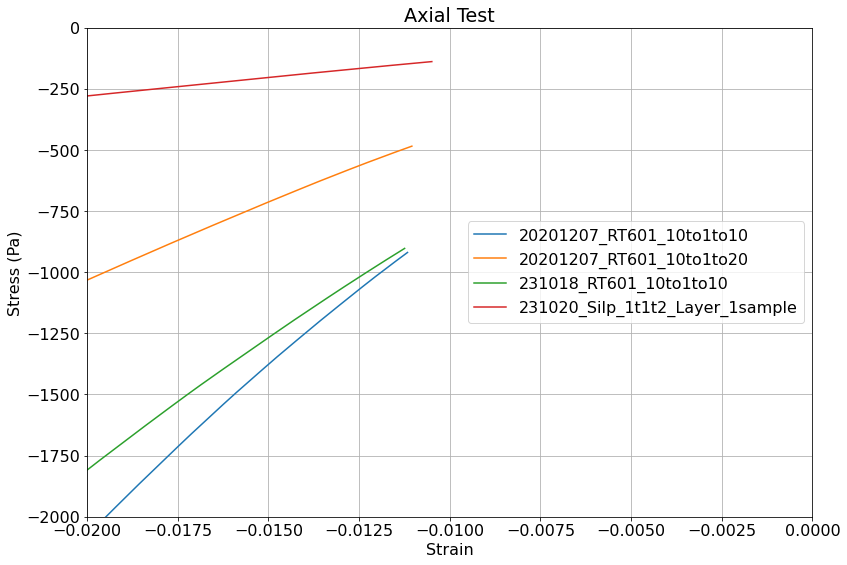

In [60]:
plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(-Strains[2],Stresses[2], label = Mixtures[2])
plt.plot(-Strains[3],Stresses[3], label = Mixtures[3])
plt.plot(-Strains[14],Stresses[14], label = Mixtures[14])
plt.plot(-Strains[15],Stresses[15], label = Mixtures[15])

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
#plt.xlim([-upper_strain_bound,-lower_strain_bound])
plt.ylim([-2000,0])
plt.xlim([-0.02,0])
#ax.set_yscale('log')
#plt.ylim([-1,1])
plt.title("Axial Test")
plt.xlabel("Strain")
plt.ylabel("Stress (Pa)")
plt.grid()
plt.show()

In [61]:
Mixtures[15]

'231020_Silp_1t1t2_Layer_1sample'

In [62]:
np.set_printoptions(threshold=np. inf, suppress=True, linewidth=np. inf)
# print(str(np.transpose(np.array([-Strains[2][::-1]]))).replace(' [', '').replace('[', '').replace(']', '')) # -Strains

In [63]:
3.7/0.8

4.625

In [64]:
3.3/5

0.6599999999999999

In [65]:
(3.3+1*1)/(5)

0.86

<IPython.core.display.Javascript object>


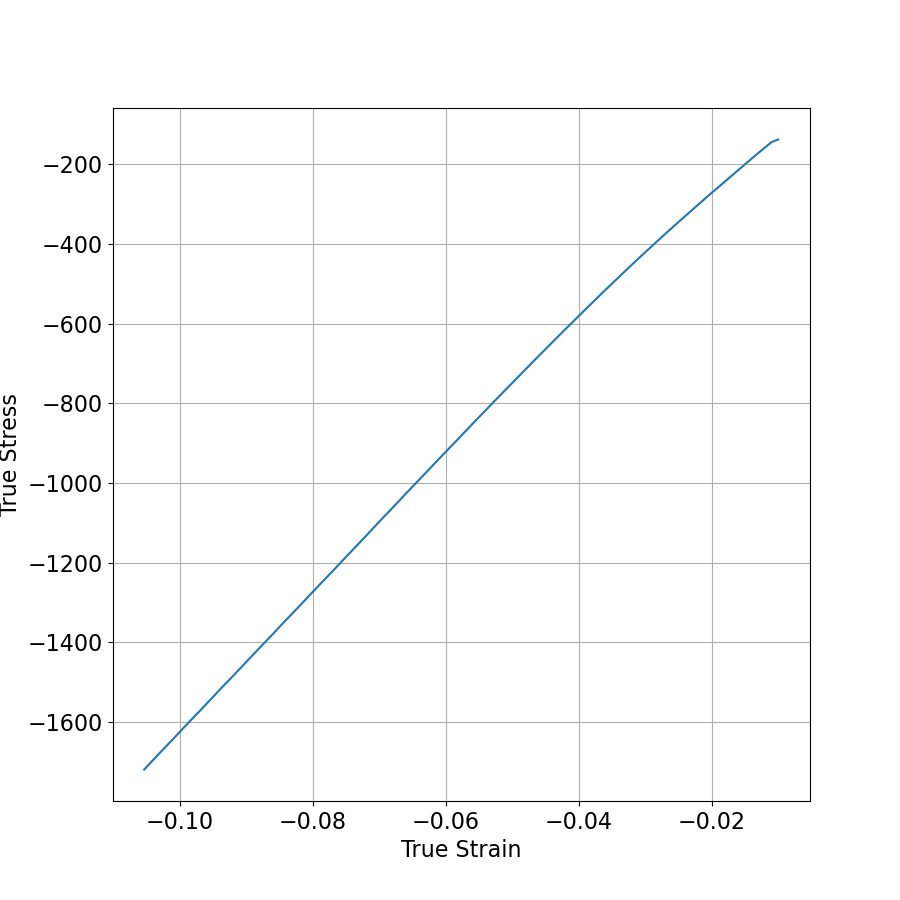

In [71]:
%matplotlib notebook
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[15]-NE_s))
    return Stresses[15][index]

NE = np.arange(-0.10,-0.01,0.001) # negative for compressive
# print(ns22(NE))
y = np.array([])
for ne in NE:
    y = np.append(y,ns22(ne)*(1+ne))

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(9,9))
ax = plt.subplot(1,1,1)
plt.plot(np.log(1+NE),y) # True Strain, True Stress
plt.xlabel("True Strain")
plt.ylabel("True Stress")
plt.grid()
plt.show()

In [ ]:
(-0.087,-1398),(-0.04,-575)

In [73]:
(-1398--575)/(-0.087--0.04)

17510.63829787234

<IPython.core.display.Javascript object>


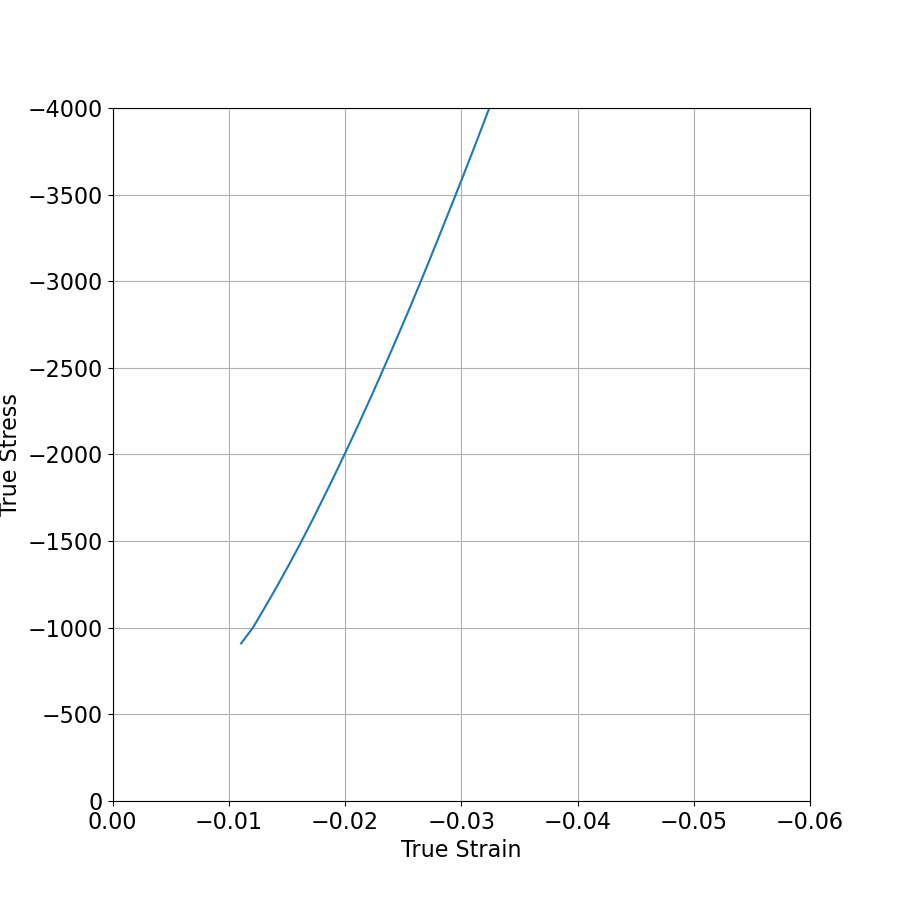

In [77]:
%matplotlib notebook
def ns22(NE_s):
    index = np.argmin(np.abs(-Strains[2]-NE_s))
    return Stresses[2][index]

NE = np.arange(-0.05,-0.01,0.001) # negative for compressive
# print(ns22(NE))
y = np.array([])
for ne in NE:
    y = np.append(y,ns22(ne)*(1+ne))

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(9,9))
ax = plt.subplot(1,1,1)
plt.plot(np.log(1+NE),y) # True Strain, True Stress
plt.xlabel("True Strain")
plt.ylabel("True Stress")
plt.ylim([0,-4000])
plt.xlim([0,-0.06])
plt.grid()
plt.show()

In [78]:
(-3600--2020)/(-0.03--0.02)

158000.00000000003

In [79]:
158000/17500

9.028571428571428